#**Deep Impute** 
#Data : Mouse (Mus musculus) brain cells
sepcifications: [Tabula Muris](https://https://tabula-muris.ds.czbiohub.org/)
                scRNA seq of Brain tissue of mouse


Implementation pipeline of Deep Impute model from scdeep package The pipline consists of the foloowing :
1. Loading the data and building a AnnData from the counts data and metadata
2. Preprocessing(quality filtering) and training the Deep Impute model
3. Comapring the quality of data before and after the application of model
4. Down stream Analysis - PCA, tSNE, UMAP, Clustering analysis
5. Additional visualizations

In [1]:
!pip install scdeep

In [2]:
!pip install -q scanpy

     |████████████████████████████████| 7.2MB 4.6MB/s 
     |████████████████████████████████| 122kB 51.8MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd 'drive/My Drive/BL uploads'

/content/drive/My Drive/BL uploads


In [5]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
%matplotlib inline 
import scdeep

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
count_dataframe = pd.read_csv('brain_counts.csv', index_col=0) 

In [7]:
metadata_dataframe = pd.read_csv('brain_metadata.csv', index_col=0)

# Constructing AnnData using the two csv files


In [8]:
adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)

In [9]:
adata.shape

(3401, 23433)

In [10]:
adata.X #expression matrix

array([[  0., 125.,  16., ...,   0.,  54.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 348.,   0., ...,   0., 113.,   0.],
       ...,
       [  0., 135.,  41., ...,   0.,  45.,   0.],
       [  0., 129.,  54., ...,   0.,  57.,   0.],
       [  0.,   1.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [11]:
from scdeep import deep_impute

In [12]:
gene_matrix = pd.DataFrame(adata.X)

In [13]:
model = deep_impute.DeepImputeModel()
gene_dataset = scdeep.dataset.GeneExpressionDataset()

In [14]:
gene_dataset.from_data(gene_matrix)
trainer = deep_impute.DeepImputeTrainer(model=model, gene_dataset=gene_dataset, batch_size=64)

Network 0: 1787 predictors, 512 targets
Network 1: 1798 predictors, 512 targets
Network 2: 1790 predictors, 512 targets
Network 3: 1825 predictors, 512 targets
Network 4: 1783 predictors, 512 targets
Network 5: 1706 predictors, 512 targets
Network 6: 1800 predictors, 512 targets
Network 7: 1809 predictors, 512 targets
Network 8: 1788 predictors, 512 targets
Network 9: 1791 predictors, 512 targets
Network 10: 1764 predictors, 512 targets
Network 11: 1824 predictors, 512 targets
Network 12: 1853 predictors, 512 targets
Network 13: 1716 predictors, 512 targets
Network 14: 1787 predictors, 512 targets
Network 15: 1777 predictors, 512 targets
Network 16: 1843 predictors, 512 targets
Network 17: 1777 predictors, 512 targets
Network 18: 1799 predictors, 512 targets
Network 19: 1809 predictors, 512 targets
Network 20: 1832 predictors, 512 targets
Network 21: 1822 predictors, 512 targets
Network 22: 1810 predictors, 512 targets
Network 23: 1810 predictors, 512 targets
Network 24: 1848 predictor

training:   0%|          | 0/100 [00:00<?, ?it/s]

module_list.0.dense_layer.weight
torch.Size([256, 1787])
module_list.0.dense_layer.bias
torch.Size([256])
module_list.0.output_layer.weight
torch.Size([512, 256])
module_list.0.output_layer.bias
torch.Size([512])
module_list.1.dense_layer.weight
torch.Size([256, 1798])
module_list.1.dense_layer.bias
torch.Size([256])
module_list.1.output_layer.weight
torch.Size([512, 256])
module_list.1.output_layer.bias
torch.Size([512])
module_list.2.dense_layer.weight
torch.Size([256, 1790])
module_list.2.dense_layer.bias
torch.Size([256])
module_list.2.output_layer.weight
torch.Size([512, 256])
module_list.2.output_layer.bias
torch.Size([512])
module_list.3.dense_layer.weight
torch.Size([256, 1825])
module_list.3.dense_layer.bias
torch.Size([256])
module_list.3.output_layer.weight
torch.Size([512, 256])
module_list.3.output_layer.bias
torch.Size([512])
module_list.4.dense_layer.weight
torch.Size([256, 1783])
module_list.4.dense_layer.bias
torch.Size([256])
module_list.4.output_layer.weight
torch.Si

training:   1%|          | 1/100 [00:13<22:33, 13.67s/it]


Validation Loss: 3.3856


Epoch: 2

Iteration: 0 Loss: 3.8110
Iteration: 1 Loss: 4.1122
Iteration: 2 Loss: 3.5818
Iteration: 3 Loss: 3.8707
Iteration: 4 Loss: 3.6606
Iteration: 5 Loss: 4.0940
Iteration: 6 Loss: 3.7876
Iteration: 7 Loss: 3.6207
Iteration: 8 Loss: 3.3880
Iteration: 9 Loss: 3.1908
Iteration: 10 Loss: 3.6299
Iteration: 11 Loss: 3.1736
Iteration: 12 Loss: 2.9954
Iteration: 13 Loss: 2.8722
Iteration: 14 Loss: 2.8498
Iteration: 15 Loss: 3.1988
Iteration: 16 Loss: 2.7838
Iteration: 17 Loss: 3.1754
Iteration: 18 Loss: 2.9430
Iteration: 19 Loss: 2.6216
Iteration: 20 Loss: 2.9286
Iteration: 21 Loss: 2.7133
Iteration: 22 Loss: 2.8847
Iteration: 23 Loss: 2.5836
Iteration: 24 Loss: 2.8004
Iteration: 25 Loss: 2.3115
Iteration: 26 Loss: 2.4361
Iteration: 27 Loss: 2.4861
Iteration: 28 Loss: 2.6444
Iteration: 29 Loss: 2.7820
Iteration: 30 Loss: 2.8015
Iteration: 31 Loss: 2.3018
Iteration: 32 Loss: 2.4127
Iteration: 33 Loss: 2.3353
Iteration: 34 Loss: 2.0813
Iteration: 35 Loss: 2.7553
I

training:   2%|▏         | 2/100 [00:26<22:04, 13.52s/it]


Validation Loss: 1.6069


Epoch: 3

Iteration: 0 Loss: 2.4623
Iteration: 1 Loss: 2.2959
Iteration: 2 Loss: 2.1209
Iteration: 3 Loss: 2.1696
Iteration: 4 Loss: 1.9650
Iteration: 5 Loss: 2.3411
Iteration: 6 Loss: 2.8546
Iteration: 7 Loss: 2.3965
Iteration: 8 Loss: 2.3860
Iteration: 9 Loss: 2.1860
Iteration: 10 Loss: 2.3676
Iteration: 11 Loss: 1.7775
Iteration: 12 Loss: 2.1908
Iteration: 13 Loss: 2.2313
Iteration: 14 Loss: 2.4453
Iteration: 15 Loss: 2.1526
Iteration: 16 Loss: 2.2737
Iteration: 17 Loss: 2.0300
Iteration: 18 Loss: 1.9429
Iteration: 19 Loss: 2.0188
Iteration: 20 Loss: 1.8600
Iteration: 21 Loss: 2.1042
Iteration: 22 Loss: 2.0441
Iteration: 23 Loss: 2.1084
Iteration: 24 Loss: 2.2826
Iteration: 25 Loss: 1.7788
Iteration: 26 Loss: 2.0382
Iteration: 27 Loss: 2.5329
Iteration: 28 Loss: 2.0181
Iteration: 29 Loss: 2.0653
Iteration: 30 Loss: 2.0278
Iteration: 31 Loss: 1.8488
Iteration: 32 Loss: 2.1495
Iteration: 33 Loss: 2.0270
Iteration: 34 Loss: 2.3834
Iteration: 35 Loss: 2.0745
I

training:   3%|▎         | 3/100 [00:39<21:37, 13.38s/it]


Validation Loss: 1.4062


Epoch: 4

Iteration: 0 Loss: 1.9191
Iteration: 1 Loss: 2.1253
Iteration: 2 Loss: 2.1042
Iteration: 3 Loss: 1.9568
Iteration: 4 Loss: 2.0122
Iteration: 5 Loss: 2.2551
Iteration: 6 Loss: 1.8290
Iteration: 7 Loss: 1.8524
Iteration: 8 Loss: 1.8613
Iteration: 9 Loss: 1.7454
Iteration: 10 Loss: 1.9260
Iteration: 11 Loss: 1.9765
Iteration: 12 Loss: 1.8756
Iteration: 13 Loss: 1.7142
Iteration: 14 Loss: 1.8284
Iteration: 15 Loss: 1.9257
Iteration: 16 Loss: 2.0024
Iteration: 17 Loss: 2.0908
Iteration: 18 Loss: 1.7950
Iteration: 19 Loss: 1.8520
Iteration: 20 Loss: 1.9980
Iteration: 21 Loss: 1.7378
Iteration: 22 Loss: 1.9546
Iteration: 23 Loss: 1.7526
Iteration: 24 Loss: 1.9798
Iteration: 25 Loss: 1.8368
Iteration: 26 Loss: 1.7324
Iteration: 27 Loss: 1.8778
Iteration: 28 Loss: 1.9989
Iteration: 29 Loss: 1.9252
Iteration: 30 Loss: 1.8853
Iteration: 31 Loss: 1.8534
Iteration: 32 Loss: 2.0741
Iteration: 33 Loss: 1.7883
Iteration: 34 Loss: 1.8819
Iteration: 35 Loss: 1.9309
I

training:   4%|▍         | 4/100 [00:53<21:19, 13.33s/it]


Validation Loss: 1.2933


Epoch: 5

Iteration: 0 Loss: 1.6079
Iteration: 1 Loss: 1.8177
Iteration: 2 Loss: 1.8978
Iteration: 3 Loss: 1.8921
Iteration: 4 Loss: 1.6163
Iteration: 5 Loss: 1.7742
Iteration: 6 Loss: 1.8427
Iteration: 7 Loss: 1.6451
Iteration: 8 Loss: 1.7602
Iteration: 9 Loss: 1.6945
Iteration: 10 Loss: 1.6569
Iteration: 11 Loss: 1.7784
Iteration: 12 Loss: 1.6420
Iteration: 13 Loss: 1.5584
Iteration: 14 Loss: 1.7568
Iteration: 15 Loss: 1.8527
Iteration: 16 Loss: 1.6431
Iteration: 17 Loss: 1.6992
Iteration: 18 Loss: 1.8399
Iteration: 19 Loss: 1.4489
Iteration: 20 Loss: 1.7125
Iteration: 21 Loss: 1.6859
Iteration: 22 Loss: 1.8599
Iteration: 23 Loss: 1.6786
Iteration: 24 Loss: 1.5569
Iteration: 25 Loss: 1.6309
Iteration: 26 Loss: 1.5912
Iteration: 27 Loss: 1.7220
Iteration: 28 Loss: 1.5229
Iteration: 29 Loss: 1.5534
Iteration: 30 Loss: 1.6760
Iteration: 31 Loss: 1.6602
Iteration: 32 Loss: 1.7342
Iteration: 33 Loss: 1.7756
Iteration: 34 Loss: 1.7777
Iteration: 35 Loss: 1.6497
I

training:   5%|▌         | 5/100 [01:06<21:02, 13.29s/it]


Validation Loss: 1.2006


Epoch: 6

Iteration: 0 Loss: 1.4764
Iteration: 1 Loss: 1.5956
Iteration: 2 Loss: 1.8805
Iteration: 3 Loss: 1.6474
Iteration: 4 Loss: 1.3566
Iteration: 5 Loss: 1.8165
Iteration: 6 Loss: 1.7108
Iteration: 7 Loss: 1.7021
Iteration: 8 Loss: 1.6677
Iteration: 9 Loss: 1.6053
Iteration: 10 Loss: 1.5299
Iteration: 11 Loss: 1.4419
Iteration: 12 Loss: 1.7739
Iteration: 13 Loss: 1.4967
Iteration: 14 Loss: 1.6270
Iteration: 15 Loss: 1.6123
Iteration: 16 Loss: 1.6019
Iteration: 17 Loss: 1.6768
Iteration: 18 Loss: 1.4142
Iteration: 19 Loss: 1.5324
Iteration: 20 Loss: 1.5205
Iteration: 21 Loss: 1.4507
Iteration: 22 Loss: 1.5512
Iteration: 23 Loss: 1.3943
Iteration: 24 Loss: 1.5415
Iteration: 25 Loss: 1.5757
Iteration: 26 Loss: 1.3733
Iteration: 27 Loss: 1.3821
Iteration: 28 Loss: 1.4129
Iteration: 29 Loss: 1.4543
Iteration: 30 Loss: 1.4853
Iteration: 31 Loss: 1.6277
Iteration: 32 Loss: 1.5721
Iteration: 33 Loss: 1.6374
Iteration: 34 Loss: 1.3899
Iteration: 35 Loss: 1.6557
I

training:   6%|▌         | 6/100 [01:19<20:43, 13.22s/it]


Validation Loss: 1.1545


Epoch: 7

Iteration: 0 Loss: 1.5141
Iteration: 1 Loss: 1.4214
Iteration: 2 Loss: 1.2878
Iteration: 3 Loss: 1.5743
Iteration: 4 Loss: 1.3898
Iteration: 5 Loss: 1.6582
Iteration: 6 Loss: 1.4278
Iteration: 7 Loss: 1.5835
Iteration: 8 Loss: 1.4678
Iteration: 9 Loss: 1.5887
Iteration: 10 Loss: 1.2637
Iteration: 11 Loss: 1.5246
Iteration: 12 Loss: 1.4043
Iteration: 13 Loss: 1.3350
Iteration: 14 Loss: 1.5943
Iteration: 15 Loss: 1.5129
Iteration: 16 Loss: 1.2410
Iteration: 17 Loss: 1.4446
Iteration: 18 Loss: 1.3951
Iteration: 19 Loss: 1.3579
Iteration: 20 Loss: 1.3859
Iteration: 21 Loss: 1.2123
Iteration: 22 Loss: 1.5164
Iteration: 23 Loss: 1.5589
Iteration: 24 Loss: 1.6306
Iteration: 25 Loss: 1.5298
Iteration: 26 Loss: 1.4352
Iteration: 27 Loss: 1.4859
Iteration: 28 Loss: 1.6061
Iteration: 29 Loss: 1.4905
Iteration: 30 Loss: 1.5881
Iteration: 31 Loss: 1.3801
Iteration: 32 Loss: 1.5136
Iteration: 33 Loss: 1.2908
Iteration: 34 Loss: 1.5630
Iteration: 35 Loss: 1.4448
I

training:   7%|▋         | 7/100 [01:32<20:31, 13.24s/it]


Validation Loss: 1.1163


Epoch: 8

Iteration: 0 Loss: 1.4561
Iteration: 1 Loss: 1.5232
Iteration: 2 Loss: 1.5957
Iteration: 3 Loss: 1.3156
Iteration: 4 Loss: 1.2969
Iteration: 5 Loss: 1.2771
Iteration: 6 Loss: 1.3686
Iteration: 7 Loss: 1.4950
Iteration: 8 Loss: 1.3340
Iteration: 9 Loss: 1.3439
Iteration: 10 Loss: 1.3331
Iteration: 11 Loss: 1.2940
Iteration: 12 Loss: 1.3485
Iteration: 13 Loss: 1.4126
Iteration: 14 Loss: 1.4467
Iteration: 15 Loss: 1.2989
Iteration: 16 Loss: 1.5379
Iteration: 17 Loss: 1.4153
Iteration: 18 Loss: 1.2986
Iteration: 19 Loss: 1.4197
Iteration: 20 Loss: 1.4475
Iteration: 21 Loss: 1.2248
Iteration: 22 Loss: 1.4151
Iteration: 23 Loss: 1.4274
Iteration: 24 Loss: 1.2553
Iteration: 25 Loss: 1.3773
Iteration: 26 Loss: 1.4713
Iteration: 27 Loss: 1.2739
Iteration: 28 Loss: 1.3934
Iteration: 29 Loss: 1.2109
Iteration: 30 Loss: 1.3784
Iteration: 31 Loss: 1.5059
Iteration: 32 Loss: 1.4780
Iteration: 33 Loss: 1.3208
Iteration: 34 Loss: 1.3393
Iteration: 35 Loss: 1.4310
I

training:   8%|▊         | 8/100 [01:45<20:08, 13.13s/it]


Validation Loss: 1.0918


Epoch: 9

Iteration: 0 Loss: 1.3440
Iteration: 1 Loss: 1.4657
Iteration: 2 Loss: 1.2318
Iteration: 3 Loss: 1.3984
Iteration: 4 Loss: 1.3378
Iteration: 5 Loss: 1.2825
Iteration: 6 Loss: 1.4220
Iteration: 7 Loss: 1.2038
Iteration: 8 Loss: 1.4095
Iteration: 9 Loss: 1.2653
Iteration: 10 Loss: 1.2753
Iteration: 11 Loss: 1.2994
Iteration: 12 Loss: 1.4397
Iteration: 13 Loss: 1.4970
Iteration: 14 Loss: 1.4285
Iteration: 15 Loss: 1.2376
Iteration: 16 Loss: 1.2447
Iteration: 17 Loss: 1.4644
Iteration: 18 Loss: 1.3219
Iteration: 19 Loss: 1.3840
Iteration: 20 Loss: 1.2865
Iteration: 21 Loss: 1.2657
Iteration: 22 Loss: 1.3720
Iteration: 23 Loss: 1.3248
Iteration: 24 Loss: 1.3113
Iteration: 25 Loss: 1.4008
Iteration: 26 Loss: 1.2128
Iteration: 27 Loss: 1.3219
Iteration: 28 Loss: 1.4502
Iteration: 29 Loss: 1.1584
Iteration: 30 Loss: 1.3804
Iteration: 31 Loss: 1.2729
Iteration: 32 Loss: 1.3435
Iteration: 33 Loss: 1.3715
Iteration: 34 Loss: 1.4063
Iteration: 35 Loss: 1.3131
I

training:   9%|▉         | 9/100 [01:58<19:50, 13.08s/it]


Validation Loss: 1.0742


Epoch: 10

Iteration: 0 Loss: 1.2929
Iteration: 1 Loss: 1.3062
Iteration: 2 Loss: 1.4357
Iteration: 3 Loss: 1.3298
Iteration: 4 Loss: 1.3275
Iteration: 5 Loss: 1.3305
Iteration: 6 Loss: 1.0915
Iteration: 7 Loss: 1.2769
Iteration: 8 Loss: 1.2790
Iteration: 9 Loss: 1.3064
Iteration: 10 Loss: 1.3318
Iteration: 11 Loss: 1.3894
Iteration: 12 Loss: 1.2956
Iteration: 13 Loss: 1.2108
Iteration: 14 Loss: 1.3057
Iteration: 15 Loss: 1.3176
Iteration: 16 Loss: 1.2327
Iteration: 17 Loss: 1.3869
Iteration: 18 Loss: 1.3199
Iteration: 19 Loss: 1.3644
Iteration: 20 Loss: 1.2101
Iteration: 21 Loss: 1.4084
Iteration: 22 Loss: 1.2007
Iteration: 23 Loss: 1.2757
Iteration: 24 Loss: 1.2333
Iteration: 25 Loss: 1.2506
Iteration: 26 Loss: 1.2338
Iteration: 27 Loss: 1.3617
Iteration: 28 Loss: 1.2504
Iteration: 29 Loss: 1.2402
Iteration: 30 Loss: 1.2003
Iteration: 31 Loss: 1.3575
Iteration: 32 Loss: 1.4238
Iteration: 33 Loss: 1.4056
Iteration: 34 Loss: 1.2415
Iteration: 35 Loss: 1.3416


training:  10%|█         | 10/100 [02:11<19:35, 13.07s/it]


Validation Loss: 1.0633


Epoch: 11

Iteration: 0 Loss: 1.2872
Iteration: 1 Loss: 1.2308
Iteration: 2 Loss: 1.1281
Iteration: 3 Loss: 1.2961
Iteration: 4 Loss: 1.2604
Iteration: 5 Loss: 1.3753
Iteration: 6 Loss: 1.1809
Iteration: 7 Loss: 1.3049
Iteration: 8 Loss: 1.3019
Iteration: 9 Loss: 1.2136
Iteration: 10 Loss: 1.2114
Iteration: 11 Loss: 1.3842
Iteration: 12 Loss: 1.2792
Iteration: 13 Loss: 1.3579
Iteration: 14 Loss: 1.2791
Iteration: 15 Loss: 1.2172
Iteration: 16 Loss: 1.1752
Iteration: 17 Loss: 1.2460
Iteration: 18 Loss: 1.2254
Iteration: 19 Loss: 1.2692
Iteration: 20 Loss: 1.4586
Iteration: 21 Loss: 1.2029
Iteration: 22 Loss: 1.3304
Iteration: 23 Loss: 1.2949
Iteration: 24 Loss: 1.2947
Iteration: 25 Loss: 1.2258
Iteration: 26 Loss: 1.2316
Iteration: 27 Loss: 1.2158
Iteration: 28 Loss: 1.2050
Iteration: 29 Loss: 1.3501
Iteration: 30 Loss: 1.1121
Iteration: 31 Loss: 1.2832
Iteration: 32 Loss: 1.3333
Iteration: 33 Loss: 1.2047
Iteration: 34 Loss: 1.2452
Iteration: 35 Loss: 1.2637


training:  11%|█         | 11/100 [02:24<19:17, 13.00s/it]


Validation Loss: 1.0581


Epoch: 12

Iteration: 0 Loss: 1.2004
Iteration: 1 Loss: 1.2678
Iteration: 2 Loss: 1.3359
Iteration: 3 Loss: 1.2070
Iteration: 4 Loss: 1.2862
Iteration: 5 Loss: 1.2199
Iteration: 6 Loss: 1.2710
Iteration: 7 Loss: 1.2304
Iteration: 8 Loss: 1.2106
Iteration: 9 Loss: 1.2675
Iteration: 10 Loss: 1.3196
Iteration: 11 Loss: 1.2090
Iteration: 12 Loss: 1.1889
Iteration: 13 Loss: 1.2287
Iteration: 14 Loss: 1.2743
Iteration: 15 Loss: 1.1549
Iteration: 16 Loss: 1.3150
Iteration: 17 Loss: 1.2635
Iteration: 18 Loss: 1.3033
Iteration: 19 Loss: 1.1188
Iteration: 20 Loss: 1.3491
Iteration: 21 Loss: 1.2850
Iteration: 22 Loss: 1.2640
Iteration: 23 Loss: 1.2195
Iteration: 24 Loss: 1.2180
Iteration: 25 Loss: 1.1429
Iteration: 26 Loss: 1.2179
Iteration: 27 Loss: 1.0956
Iteration: 28 Loss: 1.1735
Iteration: 29 Loss: 1.1934
Iteration: 30 Loss: 1.1411
Iteration: 31 Loss: 1.2836
Iteration: 32 Loss: 1.1247
Iteration: 33 Loss: 1.3103
Iteration: 34 Loss: 1.3986
Iteration: 35 Loss: 1.2550


training:  12%|█▏        | 12/100 [02:37<19:00, 12.96s/it]


Validation Loss: 1.0399


Epoch: 13

Iteration: 0 Loss: 1.2244
Iteration: 1 Loss: 1.1606
Iteration: 2 Loss: 1.2405
Iteration: 3 Loss: 1.2734
Iteration: 4 Loss: 1.1462
Iteration: 5 Loss: 1.2039
Iteration: 6 Loss: 1.1916
Iteration: 7 Loss: 1.2407
Iteration: 8 Loss: 1.0812
Iteration: 9 Loss: 1.2789
Iteration: 10 Loss: 1.2501
Iteration: 11 Loss: 1.2911
Iteration: 12 Loss: 1.3236
Iteration: 13 Loss: 1.1092
Iteration: 14 Loss: 1.0281
Iteration: 15 Loss: 1.1120
Iteration: 16 Loss: 1.0606
Iteration: 17 Loss: 1.1031
Iteration: 18 Loss: 1.3858
Iteration: 19 Loss: 1.1180
Iteration: 20 Loss: 1.2075
Iteration: 21 Loss: 1.2202
Iteration: 22 Loss: 1.1044
Iteration: 23 Loss: 1.2040
Iteration: 24 Loss: 1.2609
Iteration: 25 Loss: 1.3020
Iteration: 26 Loss: 1.1811
Iteration: 27 Loss: 1.1878
Iteration: 28 Loss: 1.1989
Iteration: 29 Loss: 0.9761
Iteration: 30 Loss: 1.1824
Iteration: 31 Loss: 1.2641
Iteration: 32 Loss: 1.0865
Iteration: 33 Loss: 1.2483
Iteration: 34 Loss: 1.2294
Iteration: 35 Loss: 1.2996


training:  13%|█▎        | 13/100 [02:50<18:44, 12.92s/it]


Validation Loss: 1.0351


Epoch: 14

Iteration: 0 Loss: 1.2748
Iteration: 1 Loss: 1.1512
Iteration: 2 Loss: 1.1635
Iteration: 3 Loss: 1.1692
Iteration: 4 Loss: 1.2730
Iteration: 5 Loss: 1.2445
Iteration: 6 Loss: 1.2001
Iteration: 7 Loss: 1.1934
Iteration: 8 Loss: 1.0820
Iteration: 9 Loss: 1.2420
Iteration: 10 Loss: 1.1353
Iteration: 11 Loss: 1.2311
Iteration: 12 Loss: 1.2609
Iteration: 13 Loss: 1.1522
Iteration: 14 Loss: 1.2722
Iteration: 15 Loss: 1.1356
Iteration: 16 Loss: 1.0329
Iteration: 17 Loss: 1.2095
Iteration: 18 Loss: 1.2141
Iteration: 19 Loss: 1.1253
Iteration: 20 Loss: 1.1397
Iteration: 21 Loss: 1.1458
Iteration: 22 Loss: 1.1712
Iteration: 23 Loss: 1.1941
Iteration: 24 Loss: 1.2392
Iteration: 25 Loss: 1.1743
Iteration: 26 Loss: 1.2603
Iteration: 27 Loss: 1.0558
Iteration: 28 Loss: 1.2264
Iteration: 29 Loss: 1.0841
Iteration: 30 Loss: 1.0869
Iteration: 31 Loss: 1.1620
Iteration: 32 Loss: 1.1703
Iteration: 33 Loss: 1.2330
Iteration: 34 Loss: 1.2692
Iteration: 35 Loss: 1.0451


training:  14%|█▍        | 14/100 [03:03<18:33, 12.95s/it]


Validation Loss: 1.0292


Epoch: 15

Iteration: 0 Loss: 1.2240
Iteration: 1 Loss: 1.1960
Iteration: 2 Loss: 1.1219
Iteration: 3 Loss: 1.0970
Iteration: 4 Loss: 1.0744
Iteration: 5 Loss: 1.1824
Iteration: 6 Loss: 1.2632
Iteration: 7 Loss: 1.1058
Iteration: 8 Loss: 1.0662
Iteration: 9 Loss: 1.2778
Iteration: 10 Loss: 1.1524
Iteration: 11 Loss: 1.3543
Iteration: 12 Loss: 1.1322
Iteration: 13 Loss: 1.1451
Iteration: 14 Loss: 1.0659
Iteration: 15 Loss: 1.1914
Iteration: 16 Loss: 1.1601
Iteration: 17 Loss: 1.1845
Iteration: 18 Loss: 1.2142
Iteration: 19 Loss: 1.1932
Iteration: 20 Loss: 1.2300
Iteration: 21 Loss: 1.1470
Iteration: 22 Loss: 1.1542
Iteration: 23 Loss: 1.1071
Iteration: 24 Loss: 1.0973
Iteration: 25 Loss: 1.1646
Iteration: 26 Loss: 1.0175
Iteration: 27 Loss: 1.2046
Iteration: 28 Loss: 1.2105
Iteration: 29 Loss: 1.1852
Iteration: 30 Loss: 1.1209
Iteration: 31 Loss: 1.1775
Iteration: 32 Loss: 1.1554
Iteration: 33 Loss: 1.1257
Iteration: 34 Loss: 1.0946
Iteration: 35 Loss: 1.2204


training:  15%|█▌        | 15/100 [03:16<18:21, 12.96s/it]


Validation Loss: 1.0195


Epoch: 16

Iteration: 0 Loss: 1.0813
Iteration: 1 Loss: 1.0686
Iteration: 2 Loss: 1.2213
Iteration: 3 Loss: 1.1946
Iteration: 4 Loss: 1.1441
Iteration: 5 Loss: 1.0611
Iteration: 6 Loss: 1.0737
Iteration: 7 Loss: 1.1775
Iteration: 8 Loss: 1.0547
Iteration: 9 Loss: 1.1112
Iteration: 10 Loss: 1.2696
Iteration: 11 Loss: 1.2037
Iteration: 12 Loss: 1.1032
Iteration: 13 Loss: 1.2277
Iteration: 14 Loss: 1.1569
Iteration: 15 Loss: 1.2566
Iteration: 16 Loss: 1.1226
Iteration: 17 Loss: 1.1342
Iteration: 18 Loss: 1.0554
Iteration: 19 Loss: 1.1483
Iteration: 20 Loss: 1.0722
Iteration: 21 Loss: 1.2336
Iteration: 22 Loss: 1.1226
Iteration: 23 Loss: 1.1835
Iteration: 24 Loss: 1.1328
Iteration: 25 Loss: 1.0855
Iteration: 26 Loss: 1.1675
Iteration: 27 Loss: 1.1119
Iteration: 28 Loss: 1.1161
Iteration: 29 Loss: 1.1493
Iteration: 30 Loss: 1.0580
Iteration: 31 Loss: 1.0590
Iteration: 32 Loss: 1.2414
Iteration: 33 Loss: 1.1543
Iteration: 34 Loss: 1.1396
Iteration: 35 Loss: 1.1060


training:  16%|█▌        | 16/100 [03:29<18:08, 12.95s/it]


Validation Loss: 1.0209


Epoch: 17

Iteration: 0 Loss: 1.1328
Iteration: 1 Loss: 1.1196
Iteration: 2 Loss: 1.0480
Iteration: 3 Loss: 1.0755
Iteration: 4 Loss: 1.1401
Iteration: 5 Loss: 1.0640
Iteration: 6 Loss: 1.0993
Iteration: 7 Loss: 1.1819
Iteration: 8 Loss: 1.1494
Iteration: 9 Loss: 1.0866
Iteration: 10 Loss: 1.1032
Iteration: 11 Loss: 1.0574
Iteration: 12 Loss: 1.0856
Iteration: 13 Loss: 1.0896
Iteration: 14 Loss: 1.1328
Iteration: 15 Loss: 1.1759
Iteration: 16 Loss: 1.2295
Iteration: 17 Loss: 1.0475
Iteration: 18 Loss: 1.0651
Iteration: 19 Loss: 1.1280
Iteration: 20 Loss: 1.0783
Iteration: 21 Loss: 1.2380
Iteration: 22 Loss: 1.1924
Iteration: 23 Loss: 1.1288
Iteration: 24 Loss: 1.1096
Iteration: 25 Loss: 1.1576
Iteration: 26 Loss: 1.1902
Iteration: 27 Loss: 1.1091
Iteration: 28 Loss: 1.0998
Iteration: 29 Loss: 1.0792
Iteration: 30 Loss: 1.1379
Iteration: 31 Loss: 1.1692
Iteration: 32 Loss: 1.1317
Iteration: 33 Loss: 1.0611
Iteration: 34 Loss: 1.2184
Iteration: 35 Loss: 1.0271


training:  17%|█▋        | 17/100 [03:42<17:57, 12.98s/it]


Validation Loss: 1.0196


Epoch: 18

Iteration: 0 Loss: 1.1659
Iteration: 1 Loss: 1.2119
Iteration: 2 Loss: 1.0444
Iteration: 3 Loss: 1.0368
Iteration: 4 Loss: 1.1659
Iteration: 5 Loss: 1.0759
Iteration: 6 Loss: 1.1478
Iteration: 7 Loss: 1.1253
Iteration: 8 Loss: 0.9976
Iteration: 9 Loss: 1.0724
Iteration: 10 Loss: 1.0315
Iteration: 11 Loss: 0.9762
Iteration: 12 Loss: 1.1693
Iteration: 13 Loss: 1.1082
Iteration: 14 Loss: 1.0793
Iteration: 15 Loss: 1.0837
Iteration: 16 Loss: 1.1465
Iteration: 17 Loss: 1.0500
Iteration: 18 Loss: 0.9724
Iteration: 19 Loss: 1.1001
Iteration: 20 Loss: 1.1405
Iteration: 21 Loss: 1.0608
Iteration: 22 Loss: 1.1197
Iteration: 23 Loss: 1.1025
Iteration: 24 Loss: 1.2951
Iteration: 25 Loss: 1.1967
Iteration: 26 Loss: 1.0642
Iteration: 27 Loss: 1.1845
Iteration: 28 Loss: 1.0808
Iteration: 29 Loss: 1.0657
Iteration: 30 Loss: 1.1209
Iteration: 31 Loss: 1.0641
Iteration: 32 Loss: 1.2025
Iteration: 33 Loss: 1.0247
Iteration: 34 Loss: 1.0684
Iteration: 35 Loss: 1.0954


training:  18%|█▊        | 18/100 [03:54<17:39, 12.92s/it]


Validation Loss: 1.0130


Epoch: 19

Iteration: 0 Loss: 1.1920
Iteration: 1 Loss: 1.0315
Iteration: 2 Loss: 1.1624
Iteration: 3 Loss: 1.1157
Iteration: 4 Loss: 1.1767
Iteration: 5 Loss: 1.1398
Iteration: 6 Loss: 1.0725
Iteration: 7 Loss: 1.0831
Iteration: 8 Loss: 1.1432
Iteration: 9 Loss: 1.1366
Iteration: 10 Loss: 1.1249
Iteration: 11 Loss: 1.0675
Iteration: 12 Loss: 1.0352
Iteration: 13 Loss: 1.1191
Iteration: 14 Loss: 1.0786
Iteration: 15 Loss: 1.1076
Iteration: 16 Loss: 1.0140
Iteration: 17 Loss: 1.0020
Iteration: 18 Loss: 1.1360
Iteration: 19 Loss: 1.0144
Iteration: 20 Loss: 1.1546
Iteration: 21 Loss: 1.0483
Iteration: 22 Loss: 1.0533
Iteration: 23 Loss: 1.0798
Iteration: 24 Loss: 1.0389
Iteration: 25 Loss: 0.9734
Iteration: 26 Loss: 0.9894
Iteration: 27 Loss: 1.0218
Iteration: 28 Loss: 1.1433
Iteration: 29 Loss: 1.0579
Iteration: 30 Loss: 1.2011
Iteration: 31 Loss: 1.0909
Iteration: 32 Loss: 1.0327
Iteration: 33 Loss: 1.0164
Iteration: 34 Loss: 1.1725
Iteration: 35 Loss: 1.1522


training:  19%|█▉        | 19/100 [04:07<17:22, 12.87s/it]


Validation Loss: 1.0062


Epoch: 20

Iteration: 0 Loss: 1.0868
Iteration: 1 Loss: 1.0662
Iteration: 2 Loss: 1.0150
Iteration: 3 Loss: 1.0206
Iteration: 4 Loss: 1.1659
Iteration: 5 Loss: 1.0002
Iteration: 6 Loss: 0.9747
Iteration: 7 Loss: 1.0692
Iteration: 8 Loss: 1.1685
Iteration: 9 Loss: 1.0733
Iteration: 10 Loss: 1.1625
Iteration: 11 Loss: 1.1202
Iteration: 12 Loss: 1.1167
Iteration: 13 Loss: 1.0097
Iteration: 14 Loss: 1.1215
Iteration: 15 Loss: 1.0481
Iteration: 16 Loss: 1.0070
Iteration: 17 Loss: 1.0232
Iteration: 18 Loss: 1.1232
Iteration: 19 Loss: 1.0507
Iteration: 20 Loss: 1.1329
Iteration: 21 Loss: 1.0613
Iteration: 22 Loss: 1.0830
Iteration: 23 Loss: 1.1139
Iteration: 24 Loss: 1.1400
Iteration: 25 Loss: 0.9934
Iteration: 26 Loss: 1.0070
Iteration: 27 Loss: 1.0232
Iteration: 28 Loss: 1.0434
Iteration: 29 Loss: 1.0564
Iteration: 30 Loss: 1.2162
Iteration: 31 Loss: 1.1330
Iteration: 32 Loss: 1.1460
Iteration: 33 Loss: 1.1159
Iteration: 34 Loss: 1.0403
Iteration: 35 Loss: 1.0851


training:  20%|██        | 20/100 [04:20<17:06, 12.83s/it]


Validation Loss: 1.0123


Epoch: 21

Iteration: 0 Loss: 1.1114
Iteration: 1 Loss: 1.0260
Iteration: 2 Loss: 1.1023
Iteration: 3 Loss: 1.0638
Iteration: 4 Loss: 1.0551
Iteration: 5 Loss: 0.9897
Iteration: 6 Loss: 1.0581
Iteration: 7 Loss: 1.0231
Iteration: 8 Loss: 1.1360
Iteration: 9 Loss: 1.0937
Iteration: 10 Loss: 1.0490
Iteration: 11 Loss: 1.1062
Iteration: 12 Loss: 1.0606
Iteration: 13 Loss: 1.0849
Iteration: 14 Loss: 1.0801
Iteration: 15 Loss: 1.0304
Iteration: 16 Loss: 1.1233
Iteration: 17 Loss: 1.0994
Iteration: 18 Loss: 1.1664
Iteration: 19 Loss: 0.9583
Iteration: 20 Loss: 1.0309
Iteration: 21 Loss: 1.0214
Iteration: 22 Loss: 1.0818
Iteration: 23 Loss: 0.9991
Iteration: 24 Loss: 0.9750
Iteration: 25 Loss: 1.0600
Iteration: 26 Loss: 1.1231
Iteration: 27 Loss: 1.0908
Iteration: 28 Loss: 1.0591
Iteration: 29 Loss: 1.0181
Iteration: 30 Loss: 1.0794
Iteration: 31 Loss: 1.1193
Iteration: 32 Loss: 0.9889
Iteration: 33 Loss: 1.0078
Iteration: 34 Loss: 1.0669
Iteration: 35 Loss: 1.0135


training:  21%|██        | 21/100 [04:32<16:47, 12.76s/it]


Validation Loss: 1.0006


Epoch: 22

Iteration: 0 Loss: 1.1354
Iteration: 1 Loss: 1.0867
Iteration: 2 Loss: 1.1266
Iteration: 3 Loss: 1.0441
Iteration: 4 Loss: 1.2905
Iteration: 5 Loss: 1.0254
Iteration: 6 Loss: 1.1331
Iteration: 7 Loss: 1.0058
Iteration: 8 Loss: 1.0664
Iteration: 9 Loss: 1.0595
Iteration: 10 Loss: 1.0685
Iteration: 11 Loss: 1.0842
Iteration: 12 Loss: 1.0012
Iteration: 13 Loss: 1.2175
Iteration: 14 Loss: 0.8932
Iteration: 15 Loss: 1.1132
Iteration: 16 Loss: 1.0161
Iteration: 17 Loss: 1.0156
Iteration: 18 Loss: 1.2043
Iteration: 19 Loss: 0.9501
Iteration: 20 Loss: 1.0478
Iteration: 21 Loss: 1.0269
Iteration: 22 Loss: 1.0720
Iteration: 23 Loss: 1.0318
Iteration: 24 Loss: 0.9232
Iteration: 25 Loss: 1.0238
Iteration: 26 Loss: 1.0954
Iteration: 27 Loss: 1.1293
Iteration: 28 Loss: 1.0652
Iteration: 29 Loss: 1.0843
Iteration: 30 Loss: 1.0875
Iteration: 31 Loss: 1.0694
Iteration: 32 Loss: 0.9591
Iteration: 33 Loss: 0.9259
Iteration: 34 Loss: 1.1354
Iteration: 35 Loss: 1.0813


training:  22%|██▏       | 22/100 [04:45<16:35, 12.76s/it]


Validation Loss: 0.9975


Epoch: 23

Iteration: 0 Loss: 0.9620
Iteration: 1 Loss: 0.9486
Iteration: 2 Loss: 1.0298
Iteration: 3 Loss: 0.9857
Iteration: 4 Loss: 1.0250
Iteration: 5 Loss: 1.1140
Iteration: 6 Loss: 1.0511
Iteration: 7 Loss: 1.0146
Iteration: 8 Loss: 1.1025
Iteration: 9 Loss: 1.0209
Iteration: 10 Loss: 0.9827
Iteration: 11 Loss: 0.9723
Iteration: 12 Loss: 1.1243
Iteration: 13 Loss: 1.1532
Iteration: 14 Loss: 0.9470
Iteration: 15 Loss: 1.0419
Iteration: 16 Loss: 1.0609
Iteration: 17 Loss: 1.1259
Iteration: 18 Loss: 0.9119
Iteration: 19 Loss: 1.1107
Iteration: 20 Loss: 1.0547
Iteration: 21 Loss: 1.0471
Iteration: 22 Loss: 1.0095
Iteration: 23 Loss: 0.9798
Iteration: 24 Loss: 1.0624
Iteration: 25 Loss: 1.0491
Iteration: 26 Loss: 1.0072
Iteration: 27 Loss: 1.1267
Iteration: 28 Loss: 1.0450
Iteration: 29 Loss: 1.0034
Iteration: 30 Loss: 1.0250
Iteration: 31 Loss: 1.1026
Iteration: 32 Loss: 1.1907
Iteration: 33 Loss: 1.0915
Iteration: 34 Loss: 1.1222
Iteration: 35 Loss: 1.0103


training:  23%|██▎       | 23/100 [04:58<16:23, 12.77s/it]


Validation Loss: 1.0006


Epoch: 24

Iteration: 0 Loss: 1.0127
Iteration: 1 Loss: 1.0123
Iteration: 2 Loss: 0.9431
Iteration: 3 Loss: 0.9250
Iteration: 4 Loss: 1.0486
Iteration: 5 Loss: 1.0241
Iteration: 6 Loss: 1.0462
Iteration: 7 Loss: 1.0738
Iteration: 8 Loss: 1.0086
Iteration: 9 Loss: 1.0865
Iteration: 10 Loss: 0.9338
Iteration: 11 Loss: 1.0569
Iteration: 12 Loss: 1.0577
Iteration: 13 Loss: 1.0203
Iteration: 14 Loss: 1.0865
Iteration: 15 Loss: 1.0458
Iteration: 16 Loss: 0.9848
Iteration: 17 Loss: 0.9628
Iteration: 18 Loss: 1.0784
Iteration: 19 Loss: 1.1208
Iteration: 20 Loss: 0.9927
Iteration: 21 Loss: 0.9982
Iteration: 22 Loss: 1.0473
Iteration: 23 Loss: 1.2059
Iteration: 24 Loss: 1.0041
Iteration: 25 Loss: 0.9655
Iteration: 26 Loss: 1.0018
Iteration: 27 Loss: 0.9990
Iteration: 28 Loss: 1.1279
Iteration: 29 Loss: 1.0084
Iteration: 30 Loss: 1.2187
Iteration: 31 Loss: 1.0065
Iteration: 32 Loss: 0.9707
Iteration: 33 Loss: 0.9365
Iteration: 34 Loss: 0.8770
Iteration: 35 Loss: 1.0963


training:  24%|██▍       | 24/100 [05:11<16:10, 12.77s/it]


Validation Loss: 0.9961


Epoch: 25

Iteration: 0 Loss: 1.0181
Iteration: 1 Loss: 0.9429
Iteration: 2 Loss: 0.9954
Iteration: 3 Loss: 1.0734
Iteration: 4 Loss: 0.9718
Iteration: 5 Loss: 0.9953
Iteration: 6 Loss: 1.0117
Iteration: 7 Loss: 0.9509
Iteration: 8 Loss: 1.0787
Iteration: 9 Loss: 1.0286
Iteration: 10 Loss: 0.8834
Iteration: 11 Loss: 0.9192
Iteration: 12 Loss: 0.9876
Iteration: 13 Loss: 1.1267
Iteration: 14 Loss: 0.9948
Iteration: 15 Loss: 1.0852
Iteration: 16 Loss: 0.9390
Iteration: 17 Loss: 1.0368
Iteration: 18 Loss: 0.9861
Iteration: 19 Loss: 1.0002
Iteration: 20 Loss: 1.1048
Iteration: 21 Loss: 1.1080
Iteration: 22 Loss: 1.0324
Iteration: 23 Loss: 1.1348
Iteration: 24 Loss: 1.0214
Iteration: 25 Loss: 1.0333
Iteration: 26 Loss: 0.9361
Iteration: 27 Loss: 1.1133
Iteration: 28 Loss: 1.0639
Iteration: 29 Loss: 0.9553
Iteration: 30 Loss: 0.9697
Iteration: 31 Loss: 1.0172
Iteration: 32 Loss: 1.0465
Iteration: 33 Loss: 1.0076
Iteration: 34 Loss: 0.9911
Iteration: 35 Loss: 1.0447


training:  25%|██▌       | 25/100 [05:23<15:55, 12.74s/it]


Validation Loss: 0.9933


Epoch: 26

Iteration: 0 Loss: 0.9980
Iteration: 1 Loss: 1.0387
Iteration: 2 Loss: 1.0186
Iteration: 3 Loss: 1.0472
Iteration: 4 Loss: 1.0493
Iteration: 5 Loss: 0.9540
Iteration: 6 Loss: 1.0202
Iteration: 7 Loss: 0.9680
Iteration: 8 Loss: 0.9776
Iteration: 9 Loss: 1.0044
Iteration: 10 Loss: 1.0929
Iteration: 11 Loss: 1.0229
Iteration: 12 Loss: 1.0988
Iteration: 13 Loss: 1.0244
Iteration: 14 Loss: 0.9351
Iteration: 15 Loss: 0.9460
Iteration: 16 Loss: 1.0099
Iteration: 17 Loss: 0.9906
Iteration: 18 Loss: 1.0049
Iteration: 19 Loss: 0.9155
Iteration: 20 Loss: 1.1356
Iteration: 21 Loss: 1.0449
Iteration: 22 Loss: 0.9398
Iteration: 23 Loss: 1.0917
Iteration: 24 Loss: 1.0521
Iteration: 25 Loss: 0.9420
Iteration: 26 Loss: 1.0726
Iteration: 27 Loss: 0.9254
Iteration: 28 Loss: 1.0444
Iteration: 29 Loss: 1.1052
Iteration: 30 Loss: 1.0129
Iteration: 31 Loss: 0.9108
Iteration: 32 Loss: 1.0503
Iteration: 33 Loss: 1.0396
Iteration: 34 Loss: 1.0316
Iteration: 35 Loss: 1.0062


training:  26%|██▌       | 26/100 [05:36<15:39, 12.69s/it]


Validation Loss: 1.0030


Epoch: 27

Iteration: 0 Loss: 0.9593
Iteration: 1 Loss: 1.0006
Iteration: 2 Loss: 1.0196
Iteration: 3 Loss: 1.0085
Iteration: 4 Loss: 1.0097
Iteration: 5 Loss: 0.9020
Iteration: 6 Loss: 0.9673
Iteration: 7 Loss: 0.9835
Iteration: 8 Loss: 1.0362
Iteration: 9 Loss: 1.0250
Iteration: 10 Loss: 0.9341
Iteration: 11 Loss: 1.0009
Iteration: 12 Loss: 1.0659
Iteration: 13 Loss: 1.0357
Iteration: 14 Loss: 1.0522
Iteration: 15 Loss: 0.9949
Iteration: 16 Loss: 1.0283
Iteration: 17 Loss: 0.9396
Iteration: 18 Loss: 0.9090
Iteration: 19 Loss: 1.0933
Iteration: 20 Loss: 0.9085
Iteration: 21 Loss: 1.0671
Iteration: 22 Loss: 1.0685
Iteration: 23 Loss: 1.0324
Iteration: 24 Loss: 1.0525
Iteration: 25 Loss: 0.9620
Iteration: 26 Loss: 1.0201
Iteration: 27 Loss: 0.9495
Iteration: 28 Loss: 0.9439
Iteration: 29 Loss: 0.9194
Iteration: 30 Loss: 0.9818
Iteration: 31 Loss: 0.8875
Iteration: 32 Loss: 0.8823
Iteration: 33 Loss: 1.0405
Iteration: 34 Loss: 1.0703
Iteration: 35 Loss: 1.0244


training:  27%|██▋       | 27/100 [05:49<15:26, 12.69s/it]


Validation Loss: 1.0002


Epoch: 28

Iteration: 0 Loss: 0.8732
Iteration: 1 Loss: 0.9607
Iteration: 2 Loss: 0.9815
Iteration: 3 Loss: 1.0466
Iteration: 4 Loss: 0.9619
Iteration: 5 Loss: 1.1415
Iteration: 6 Loss: 1.0744
Iteration: 7 Loss: 0.9382
Iteration: 8 Loss: 1.0206
Iteration: 9 Loss: 0.9240
Iteration: 10 Loss: 1.0185
Iteration: 11 Loss: 1.0590
Iteration: 12 Loss: 0.7887
Iteration: 13 Loss: 0.9499
Iteration: 14 Loss: 1.0143
Iteration: 15 Loss: 0.9924
Iteration: 16 Loss: 0.9416
Iteration: 17 Loss: 1.0753
Iteration: 18 Loss: 1.1378
Iteration: 19 Loss: 1.0075
Iteration: 20 Loss: 1.0457
Iteration: 21 Loss: 0.8731
Iteration: 22 Loss: 0.9294
Iteration: 23 Loss: 1.1054
Iteration: 24 Loss: 1.0971
Iteration: 25 Loss: 0.9892
Iteration: 26 Loss: 1.0657
Iteration: 27 Loss: 1.0522
Iteration: 28 Loss: 0.8826
Iteration: 29 Loss: 1.0197
Iteration: 30 Loss: 0.9662
Iteration: 31 Loss: 0.9572
Iteration: 32 Loss: 1.0121
Iteration: 33 Loss: 0.8825
Iteration: 34 Loss: 1.0365
Iteration: 35 Loss: 0.8896


training:  28%|██▊       | 28/100 [06:01<15:14, 12.70s/it]


Validation Loss: 0.9932


Epoch: 29

Iteration: 0 Loss: 0.8940
Iteration: 1 Loss: 1.0118
Iteration: 2 Loss: 0.9085
Iteration: 3 Loss: 0.9319
Iteration: 4 Loss: 1.0376
Iteration: 5 Loss: 1.0065
Iteration: 6 Loss: 0.9972
Iteration: 7 Loss: 1.0971
Iteration: 8 Loss: 0.9550
Iteration: 9 Loss: 0.9189
Iteration: 10 Loss: 1.0809
Iteration: 11 Loss: 0.9891
Iteration: 12 Loss: 0.9186
Iteration: 13 Loss: 1.0844
Iteration: 14 Loss: 1.0816
Iteration: 15 Loss: 1.0027
Iteration: 16 Loss: 1.0217
Iteration: 17 Loss: 0.8570
Iteration: 18 Loss: 0.9213
Iteration: 19 Loss: 0.8977
Iteration: 20 Loss: 0.8764
Iteration: 21 Loss: 0.9750
Iteration: 22 Loss: 1.0276
Iteration: 23 Loss: 1.0856
Iteration: 24 Loss: 0.9336
Iteration: 25 Loss: 0.8879
Iteration: 26 Loss: 1.0005
Iteration: 27 Loss: 0.9624
Iteration: 28 Loss: 0.9086
Iteration: 29 Loss: 1.0274
Iteration: 30 Loss: 0.9309
Iteration: 31 Loss: 0.9449
Iteration: 32 Loss: 0.9197
Iteration: 33 Loss: 1.0227
Iteration: 34 Loss: 0.9181
Iteration: 35 Loss: 1.0400


training:  29%|██▉       | 29/100 [06:14<15:02, 12.71s/it]


Validation Loss: 0.9940


Epoch: 30

Iteration: 0 Loss: 1.0421
Iteration: 1 Loss: 1.0360
Iteration: 2 Loss: 0.8733
Iteration: 3 Loss: 0.9409
Iteration: 4 Loss: 0.9975
Iteration: 5 Loss: 0.8284
Iteration: 6 Loss: 1.0721
Iteration: 7 Loss: 0.9686
Iteration: 8 Loss: 0.9760
Iteration: 9 Loss: 0.9312
Iteration: 10 Loss: 0.9829
Iteration: 11 Loss: 1.0184
Iteration: 12 Loss: 0.9951
Iteration: 13 Loss: 0.9290
Iteration: 14 Loss: 1.0327
Iteration: 15 Loss: 0.9190
Iteration: 16 Loss: 1.0187
Iteration: 17 Loss: 1.1233
Iteration: 18 Loss: 0.9720
Iteration: 19 Loss: 0.9566
Iteration: 20 Loss: 0.9484
Iteration: 21 Loss: 1.0200
Iteration: 22 Loss: 1.0398
Iteration: 23 Loss: 1.0818
Iteration: 24 Loss: 1.1151
Iteration: 25 Loss: 1.0586
Iteration: 26 Loss: 0.9504
Iteration: 27 Loss: 0.8987
Iteration: 28 Loss: 0.8491
Iteration: 29 Loss: 0.9069
Iteration: 30 Loss: 0.8776
Iteration: 31 Loss: 1.0212
Iteration: 32 Loss: 0.9942
Iteration: 33 Loss: 0.8427
Iteration: 34 Loss: 0.9304
Iteration: 35 Loss: 1.0174


training:  30%|███       | 30/100 [06:27<14:49, 12.70s/it]


Validation Loss: 1.0012


Epoch: 31

Iteration: 0 Loss: 0.8558
Iteration: 1 Loss: 0.9542
Iteration: 2 Loss: 0.9565
Iteration: 3 Loss: 1.0374
Iteration: 4 Loss: 0.9121
Iteration: 5 Loss: 0.8665
Iteration: 6 Loss: 1.1268
Iteration: 7 Loss: 0.9957
Iteration: 8 Loss: 0.9710
Iteration: 9 Loss: 0.9663
Iteration: 10 Loss: 0.8958
Iteration: 11 Loss: 0.9465
Iteration: 12 Loss: 0.9660
Iteration: 13 Loss: 0.9934
Iteration: 14 Loss: 0.9847
Iteration: 15 Loss: 0.9817
Iteration: 16 Loss: 1.0700
Iteration: 17 Loss: 1.0094
Iteration: 18 Loss: 1.0432
Iteration: 19 Loss: 0.8273
Iteration: 20 Loss: 0.9060
Iteration: 21 Loss: 0.9896
Iteration: 22 Loss: 1.0001
Iteration: 23 Loss: 0.9424
Iteration: 24 Loss: 0.9528
Iteration: 25 Loss: 0.9108
Iteration: 26 Loss: 0.9273
Iteration: 27 Loss: 0.9704
Iteration: 28 Loss: 0.9487
Iteration: 29 Loss: 0.9640
Iteration: 30 Loss: 0.9982
Iteration: 31 Loss: 0.9529
Iteration: 32 Loss: 1.0169
Iteration: 33 Loss: 0.9126
Iteration: 34 Loss: 1.0536
Iteration: 35 Loss: 1.0369


training:  31%|███       | 31/100 [06:40<14:39, 12.75s/it]


Validation Loss: 0.9967


Epoch: 32

Iteration: 0 Loss: 0.9710
Iteration: 1 Loss: 0.8718
Iteration: 2 Loss: 0.9464
Iteration: 3 Loss: 0.9942
Iteration: 4 Loss: 0.9594
Iteration: 5 Loss: 0.8986
Iteration: 6 Loss: 1.0341
Iteration: 7 Loss: 0.8886
Iteration: 8 Loss: 0.9800
Iteration: 9 Loss: 0.8818
Iteration: 10 Loss: 0.8702
Iteration: 11 Loss: 1.0432
Iteration: 12 Loss: 0.9682
Iteration: 13 Loss: 0.9903
Iteration: 14 Loss: 1.0684
Iteration: 15 Loss: 0.9024
Iteration: 16 Loss: 0.9542
Iteration: 17 Loss: 0.9013
Iteration: 18 Loss: 1.0302
Iteration: 19 Loss: 0.9972
Iteration: 20 Loss: 0.9324
Iteration: 21 Loss: 0.9448
Iteration: 22 Loss: 1.0067
Iteration: 23 Loss: 1.0187
Iteration: 24 Loss: 0.9999
Iteration: 25 Loss: 1.0206
Iteration: 26 Loss: 0.9174
Iteration: 27 Loss: 0.9257
Iteration: 28 Loss: 0.9174
Iteration: 29 Loss: 0.8813
Iteration: 30 Loss: 1.0315
Iteration: 31 Loss: 0.9365
Iteration: 32 Loss: 0.8821
Iteration: 33 Loss: 0.9112
Iteration: 34 Loss: 1.0025
Iteration: 35 Loss: 0.9573


training:  32%|███▏      | 32/100 [06:52<14:27, 12.76s/it]


Validation Loss: 0.9899


Epoch: 33

Iteration: 0 Loss: 0.9197
Iteration: 1 Loss: 0.9525
Iteration: 2 Loss: 0.9554
Iteration: 3 Loss: 1.0221
Iteration: 4 Loss: 0.9534
Iteration: 5 Loss: 0.9179
Iteration: 6 Loss: 1.0027
Iteration: 7 Loss: 0.9329
Iteration: 8 Loss: 0.9277
Iteration: 9 Loss: 0.9515
Iteration: 10 Loss: 0.9536
Iteration: 11 Loss: 0.9448
Iteration: 12 Loss: 1.0106
Iteration: 13 Loss: 0.9190
Iteration: 14 Loss: 0.9104
Iteration: 15 Loss: 0.8473
Iteration: 16 Loss: 0.8777
Iteration: 17 Loss: 0.9808
Iteration: 18 Loss: 0.9664
Iteration: 19 Loss: 0.8949
Iteration: 20 Loss: 1.0022
Iteration: 21 Loss: 0.9650
Iteration: 22 Loss: 0.9419
Iteration: 23 Loss: 1.0451
Iteration: 24 Loss: 1.0249
Iteration: 25 Loss: 0.9004
Iteration: 26 Loss: 0.9047
Iteration: 27 Loss: 1.0305
Iteration: 28 Loss: 0.9633
Iteration: 29 Loss: 0.8413
Iteration: 30 Loss: 0.9779
Iteration: 31 Loss: 0.9485
Iteration: 32 Loss: 0.9764
Iteration: 33 Loss: 0.9727
Iteration: 34 Loss: 0.9413
Iteration: 35 Loss: 0.8949


training:  33%|███▎      | 33/100 [07:05<14:12, 12.73s/it]


Validation Loss: 0.9907


Epoch: 34

Iteration: 0 Loss: 0.9564
Iteration: 1 Loss: 1.0547
Iteration: 2 Loss: 0.8766
Iteration: 3 Loss: 0.9499
Iteration: 4 Loss: 0.9885
Iteration: 5 Loss: 0.9089
Iteration: 6 Loss: 0.8913
Iteration: 7 Loss: 0.9329
Iteration: 8 Loss: 0.9089
Iteration: 9 Loss: 0.8486
Iteration: 10 Loss: 1.0167
Iteration: 11 Loss: 0.9984
Iteration: 12 Loss: 1.0256
Iteration: 13 Loss: 0.9512
Iteration: 14 Loss: 0.8391
Iteration: 15 Loss: 0.9290
Iteration: 16 Loss: 0.9118
Iteration: 17 Loss: 0.9882
Iteration: 18 Loss: 0.8774
Iteration: 19 Loss: 0.9234
Iteration: 20 Loss: 0.9288
Iteration: 21 Loss: 0.9616
Iteration: 22 Loss: 1.0051
Iteration: 23 Loss: 0.9295
Iteration: 24 Loss: 1.0435
Iteration: 25 Loss: 0.9896
Iteration: 26 Loss: 0.9030
Iteration: 27 Loss: 0.9960
Iteration: 28 Loss: 1.0022
Iteration: 29 Loss: 0.9319
Iteration: 30 Loss: 0.8751
Iteration: 31 Loss: 0.9352
Iteration: 32 Loss: 0.9168
Iteration: 33 Loss: 1.0175
Iteration: 34 Loss: 0.8590
Iteration: 35 Loss: 0.9569


training:  34%|███▍      | 34/100 [07:18<13:57, 12.69s/it]


Validation Loss: 0.9911


Epoch: 35

Iteration: 0 Loss: 0.9731
Iteration: 1 Loss: 0.9732
Iteration: 2 Loss: 0.8917
Iteration: 3 Loss: 0.9058
Iteration: 4 Loss: 1.0382
Iteration: 5 Loss: 0.8954
Iteration: 6 Loss: 0.9962
Iteration: 7 Loss: 0.9195
Iteration: 8 Loss: 0.9252
Iteration: 9 Loss: 0.9539
Iteration: 10 Loss: 0.9125
Iteration: 11 Loss: 0.7858
Iteration: 12 Loss: 0.9824
Iteration: 13 Loss: 0.9640
Iteration: 14 Loss: 1.0209
Iteration: 15 Loss: 0.9280
Iteration: 16 Loss: 0.9685
Iteration: 17 Loss: 0.8933
Iteration: 18 Loss: 1.0194
Iteration: 19 Loss: 0.8971
Iteration: 20 Loss: 1.0494
Iteration: 21 Loss: 0.9539
Iteration: 22 Loss: 0.9020
Iteration: 23 Loss: 0.9229
Iteration: 24 Loss: 1.0254
Iteration: 25 Loss: 0.9142
Iteration: 26 Loss: 0.8972
Iteration: 27 Loss: 0.9002
Iteration: 28 Loss: 0.8747
Iteration: 29 Loss: 0.9421
Iteration: 30 Loss: 0.9154
Iteration: 31 Loss: 0.9637
Iteration: 32 Loss: 0.9518
Iteration: 33 Loss: 0.9801
Iteration: 34 Loss: 1.0517
Iteration: 35 Loss: 0.9893


training:  35%|███▌      | 35/100 [07:30<13:43, 12.66s/it]


Validation Loss: 0.9884


Epoch: 36

Iteration: 0 Loss: 0.9011
Iteration: 1 Loss: 0.9717
Iteration: 2 Loss: 0.9303
Iteration: 3 Loss: 0.9354
Iteration: 4 Loss: 0.9444
Iteration: 5 Loss: 0.9957
Iteration: 6 Loss: 0.9644
Iteration: 7 Loss: 0.9007
Iteration: 8 Loss: 0.8821
Iteration: 9 Loss: 0.9069
Iteration: 10 Loss: 0.9886
Iteration: 11 Loss: 0.9212
Iteration: 12 Loss: 0.9989
Iteration: 13 Loss: 0.9162
Iteration: 14 Loss: 0.9647
Iteration: 15 Loss: 0.8993
Iteration: 16 Loss: 0.9049
Iteration: 17 Loss: 0.7965
Iteration: 18 Loss: 0.9843
Iteration: 19 Loss: 1.0113
Iteration: 20 Loss: 0.8023
Iteration: 21 Loss: 0.9209
Iteration: 22 Loss: 0.9436
Iteration: 23 Loss: 0.9584
Iteration: 24 Loss: 0.8905
Iteration: 25 Loss: 1.0127
Iteration: 26 Loss: 0.8961
Iteration: 27 Loss: 0.9537
Iteration: 28 Loss: 0.8514
Iteration: 29 Loss: 0.9884
Iteration: 30 Loss: 0.9406
Iteration: 31 Loss: 0.9264
Iteration: 32 Loss: 0.9815
Iteration: 33 Loss: 0.9815
Iteration: 34 Loss: 0.8849
Iteration: 35 Loss: 0.9647


training:  36%|███▌      | 36/100 [07:43<13:32, 12.69s/it]


Validation Loss: 0.9928


Epoch: 37

Iteration: 0 Loss: 0.9061
Iteration: 1 Loss: 0.9728
Iteration: 2 Loss: 0.8710
Iteration: 3 Loss: 0.9084
Iteration: 4 Loss: 0.9232
Iteration: 5 Loss: 0.9540
Iteration: 6 Loss: 0.9162
Iteration: 7 Loss: 0.8830
Iteration: 8 Loss: 0.9622
Iteration: 9 Loss: 0.9636
Iteration: 10 Loss: 0.9717
Iteration: 11 Loss: 0.9387
Iteration: 12 Loss: 0.8390
Iteration: 13 Loss: 1.0592
Iteration: 14 Loss: 0.9268
Iteration: 15 Loss: 0.9651
Iteration: 16 Loss: 0.8723
Iteration: 17 Loss: 0.9719
Iteration: 18 Loss: 0.8781
Iteration: 19 Loss: 0.9031
Iteration: 20 Loss: 0.9859
Iteration: 21 Loss: 0.8553
Iteration: 22 Loss: 0.8738
Iteration: 23 Loss: 0.9306
Iteration: 24 Loss: 0.9464
Iteration: 25 Loss: 0.9794
Iteration: 26 Loss: 0.8966
Iteration: 27 Loss: 1.0209
Iteration: 28 Loss: 0.8875
Iteration: 29 Loss: 1.0349
Iteration: 30 Loss: 0.8887
Iteration: 31 Loss: 0.9681
Iteration: 32 Loss: 0.9270
Iteration: 33 Loss: 0.9448
Iteration: 34 Loss: 0.8789
Iteration: 35 Loss: 0.9119


training:  37%|███▋      | 37/100 [07:56<13:18, 12.67s/it]


Validation Loss: 0.9921


Epoch: 38

Iteration: 0 Loss: 0.9352
Iteration: 1 Loss: 0.8692
Iteration: 2 Loss: 0.9612
Iteration: 3 Loss: 0.9069
Iteration: 4 Loss: 0.8835
Iteration: 5 Loss: 0.9455
Iteration: 6 Loss: 0.9652
Iteration: 7 Loss: 0.9029
Iteration: 8 Loss: 0.9766
Iteration: 9 Loss: 0.8818
Iteration: 10 Loss: 0.8504
Iteration: 11 Loss: 0.8575
Iteration: 12 Loss: 0.9337
Iteration: 13 Loss: 0.9675
Iteration: 14 Loss: 0.9213
Iteration: 15 Loss: 0.9177
Iteration: 16 Loss: 0.8455
Iteration: 17 Loss: 0.9404
Iteration: 18 Loss: 0.9097
Iteration: 19 Loss: 0.8918
Iteration: 20 Loss: 1.0213
Iteration: 21 Loss: 0.9606
Iteration: 22 Loss: 0.9676
Iteration: 23 Loss: 0.9140
Iteration: 24 Loss: 0.9448
Iteration: 25 Loss: 0.9770
Iteration: 26 Loss: 0.9183
Iteration: 27 Loss: 0.8545
Iteration: 28 Loss: 0.8808
Iteration: 29 Loss: 1.0186
Iteration: 30 Loss: 0.8897
Iteration: 31 Loss: 0.9656
Iteration: 32 Loss: 0.8486
Iteration: 33 Loss: 0.9047
Iteration: 34 Loss: 0.9253
Iteration: 35 Loss: 0.8466


training:  38%|███▊      | 38/100 [08:08<13:04, 12.65s/it]


Validation Loss: 0.9934


Epoch: 39

Iteration: 0 Loss: 0.9403
Iteration: 1 Loss: 0.9676
Iteration: 2 Loss: 0.9358
Iteration: 3 Loss: 0.9013
Iteration: 4 Loss: 0.9296
Iteration: 5 Loss: 0.9252
Iteration: 6 Loss: 0.9629
Iteration: 7 Loss: 0.8652
Iteration: 8 Loss: 0.8743
Iteration: 9 Loss: 0.9176
Iteration: 10 Loss: 0.9210
Iteration: 11 Loss: 0.9606
Iteration: 12 Loss: 0.8569
Iteration: 13 Loss: 0.8657
Iteration: 14 Loss: 0.9587
Iteration: 15 Loss: 0.9387
Iteration: 16 Loss: 0.9072
Iteration: 17 Loss: 0.8554
Iteration: 18 Loss: 0.9713
Iteration: 19 Loss: 0.8704
Iteration: 20 Loss: 0.9684
Iteration: 21 Loss: 0.9597
Iteration: 22 Loss: 0.9613
Iteration: 23 Loss: 0.9113
Iteration: 24 Loss: 0.9339
Iteration: 25 Loss: 0.8667
Iteration: 26 Loss: 0.9412
Iteration: 27 Loss: 0.8937
Iteration: 28 Loss: 0.9385
Iteration: 29 Loss: 0.9121
Iteration: 30 Loss: 0.8984
Iteration: 31 Loss: 0.9114
Iteration: 32 Loss: 0.8650
Iteration: 33 Loss: 0.8791
Iteration: 34 Loss: 0.9461
Iteration: 35 Loss: 0.8106


training:  39%|███▉      | 39/100 [08:21<12:50, 12.64s/it]


Validation Loss: 0.9939


Epoch: 40

Iteration: 0 Loss: 0.9131
Iteration: 1 Loss: 0.8781
Iteration: 2 Loss: 0.8881
Iteration: 3 Loss: 0.9293
Iteration: 4 Loss: 0.9322
Iteration: 5 Loss: 0.8258
Iteration: 6 Loss: 0.9944
Iteration: 7 Loss: 0.9077
Iteration: 8 Loss: 0.8650
Iteration: 9 Loss: 0.9534
Iteration: 10 Loss: 0.9063
Iteration: 11 Loss: 0.8554
Iteration: 12 Loss: 0.9561
Iteration: 13 Loss: 0.9453
Iteration: 14 Loss: 0.8459
Iteration: 15 Loss: 0.9151
Iteration: 16 Loss: 0.8998
Iteration: 17 Loss: 1.0626
Iteration: 18 Loss: 0.9354
Iteration: 19 Loss: 0.8631
Iteration: 20 Loss: 1.0140
Iteration: 21 Loss: 0.9292
Iteration: 22 Loss: 0.8596
Iteration: 23 Loss: 0.9964
Iteration: 24 Loss: 0.9964
Iteration: 25 Loss: 0.9061
Iteration: 26 Loss: 0.9154
Iteration: 27 Loss: 0.9306
Iteration: 28 Loss: 0.8215
Iteration: 29 Loss: 0.8685
Iteration: 30 Loss: 0.8607
Iteration: 31 Loss: 0.8575
Iteration: 32 Loss: 0.8762
Iteration: 33 Loss: 0.8379
Iteration: 34 Loss: 0.9296
Iteration: 35 Loss: 0.9699


training:  40%|████      | 40/100 [08:33<12:36, 12.60s/it]


Validation Loss: 0.9900


Epoch: 41

Iteration: 0 Loss: 0.8987
Iteration: 1 Loss: 0.8192
Iteration: 2 Loss: 0.9073
Iteration: 3 Loss: 0.9147
Iteration: 4 Loss: 0.9071
Iteration: 5 Loss: 0.9327
Iteration: 6 Loss: 0.8841
Iteration: 7 Loss: 0.8978
Iteration: 8 Loss: 0.8993
Iteration: 9 Loss: 1.0344
Iteration: 10 Loss: 0.8895
Iteration: 11 Loss: 0.9532
Iteration: 12 Loss: 0.9069
Iteration: 13 Loss: 0.8318
Iteration: 14 Loss: 0.8669
Iteration: 15 Loss: 0.8214
Iteration: 16 Loss: 0.9675
Iteration: 17 Loss: 0.8979
Iteration: 18 Loss: 0.9690
Iteration: 19 Loss: 0.9134
Iteration: 20 Loss: 0.8399
Iteration: 21 Loss: 0.9556
Iteration: 22 Loss: 0.8830
Iteration: 23 Loss: 0.9133
Iteration: 24 Loss: 0.9426
Iteration: 25 Loss: 0.8658
Iteration: 26 Loss: 0.9125
Iteration: 27 Loss: 0.9163
Iteration: 28 Loss: 0.9609
Iteration: 29 Loss: 0.9192
Iteration: 30 Loss: 0.9092
Iteration: 31 Loss: 0.8550
Iteration: 32 Loss: 0.8428
Iteration: 33 Loss: 0.8667
Iteration: 34 Loss: 0.8895
Iteration: 35 Loss: 0.9105


training:  41%|████      | 41/100 [08:46<12:24, 12.62s/it]


Validation Loss: 0.9940


Epoch: 42

Iteration: 0 Loss: 0.8787
Iteration: 1 Loss: 0.8584
Iteration: 2 Loss: 0.8838
Iteration: 3 Loss: 1.0042
Iteration: 4 Loss: 0.8334
Iteration: 5 Loss: 0.8934
Iteration: 6 Loss: 0.9369
Iteration: 7 Loss: 0.7896
Iteration: 8 Loss: 0.9732
Iteration: 9 Loss: 0.9019
Iteration: 10 Loss: 0.8372
Iteration: 11 Loss: 0.8328
Iteration: 12 Loss: 0.8329
Iteration: 13 Loss: 0.8289
Iteration: 14 Loss: 1.0119
Iteration: 15 Loss: 0.8771
Iteration: 16 Loss: 0.8636
Iteration: 17 Loss: 0.9472
Iteration: 18 Loss: 0.9053
Iteration: 19 Loss: 0.9259
Iteration: 20 Loss: 0.9091
Iteration: 21 Loss: 0.8683
Iteration: 22 Loss: 0.8717
Iteration: 23 Loss: 0.9409
Iteration: 24 Loss: 0.9208
Iteration: 25 Loss: 0.9196
Iteration: 26 Loss: 0.9967
Iteration: 27 Loss: 0.9311
Iteration: 28 Loss: 0.8307
Iteration: 29 Loss: 0.8484
Iteration: 30 Loss: 0.8864
Iteration: 31 Loss: 0.8317
Iteration: 32 Loss: 0.9322
Iteration: 33 Loss: 0.9018
Iteration: 34 Loss: 0.9365
Iteration: 35 Loss: 0.8261


training:  42%|████▏     | 42/100 [08:59<12:13, 12.64s/it]


Validation Loss: 0.9907


Epoch: 43

Iteration: 0 Loss: 0.8833
Iteration: 1 Loss: 0.8943
Iteration: 2 Loss: 0.9190
Iteration: 3 Loss: 0.8979
Iteration: 4 Loss: 0.9362
Iteration: 5 Loss: 0.8538
Iteration: 6 Loss: 0.8136
Iteration: 7 Loss: 0.9442
Iteration: 8 Loss: 0.8878
Iteration: 9 Loss: 0.9005
Iteration: 10 Loss: 0.9337
Iteration: 11 Loss: 0.9466
Iteration: 12 Loss: 0.8832
Iteration: 13 Loss: 0.8613
Iteration: 14 Loss: 0.8953
Iteration: 15 Loss: 0.8204
Iteration: 16 Loss: 0.8670
Iteration: 17 Loss: 1.0058
Iteration: 18 Loss: 0.9063
Iteration: 19 Loss: 0.9155
Iteration: 20 Loss: 0.8629
Iteration: 21 Loss: 0.8291
Iteration: 22 Loss: 0.8561
Iteration: 23 Loss: 0.7883
Iteration: 24 Loss: 0.9317
Iteration: 25 Loss: 0.8054
Iteration: 26 Loss: 0.9131
Iteration: 27 Loss: 0.8842
Iteration: 28 Loss: 0.9458
Iteration: 29 Loss: 1.0329
Iteration: 30 Loss: 0.9259
Iteration: 31 Loss: 0.8727
Iteration: 32 Loss: 0.8779
Iteration: 33 Loss: 0.8428
Iteration: 34 Loss: 0.8288
Iteration: 35 Loss: 0.9355


training:  43%|████▎     | 43/100 [09:11<11:59, 12.62s/it]


Validation Loss: 0.9923


Epoch: 44

Iteration: 0 Loss: 0.8575
Iteration: 1 Loss: 0.9302
Iteration: 2 Loss: 0.9144
Iteration: 3 Loss: 0.8761
Iteration: 4 Loss: 0.8434
Iteration: 5 Loss: 0.9366
Iteration: 6 Loss: 0.9213
Iteration: 7 Loss: 0.9419
Iteration: 8 Loss: 0.8840
Iteration: 9 Loss: 0.8803
Iteration: 10 Loss: 0.9054
Iteration: 11 Loss: 0.8991
Iteration: 12 Loss: 0.9120
Iteration: 13 Loss: 0.9348
Iteration: 14 Loss: 0.7756
Iteration: 15 Loss: 0.9234
Iteration: 16 Loss: 0.8687
Iteration: 17 Loss: 0.7915
Iteration: 18 Loss: 0.8538
Iteration: 19 Loss: 0.7610
Iteration: 20 Loss: 0.8838
Iteration: 21 Loss: 0.9598
Iteration: 22 Loss: 0.8831
Iteration: 23 Loss: 0.9922
Iteration: 24 Loss: 0.8893
Iteration: 25 Loss: 0.8948
Iteration: 26 Loss: 0.8374
Iteration: 27 Loss: 0.8979
Iteration: 28 Loss: 0.8972
Iteration: 29 Loss: 0.8718
Iteration: 30 Loss: 0.9065
Iteration: 31 Loss: 0.8491
Iteration: 32 Loss: 0.9233
Iteration: 33 Loss: 0.9266
Iteration: 34 Loss: 0.8390
Iteration: 35 Loss: 0.8722


training:  44%|████▍     | 44/100 [09:24<11:46, 12.61s/it]


Validation Loss: 0.9945


Epoch: 45

Iteration: 0 Loss: 0.8637
Iteration: 1 Loss: 0.8109
Iteration: 2 Loss: 0.9136
Iteration: 3 Loss: 0.9599
Iteration: 4 Loss: 0.8486
Iteration: 5 Loss: 0.8616
Iteration: 6 Loss: 0.8508
Iteration: 7 Loss: 0.8845
Iteration: 8 Loss: 0.8800
Iteration: 9 Loss: 0.8640
Iteration: 10 Loss: 0.8736
Iteration: 11 Loss: 0.8967
Iteration: 12 Loss: 0.9960
Iteration: 13 Loss: 0.9027
Iteration: 14 Loss: 0.8402
Iteration: 15 Loss: 0.8270
Iteration: 16 Loss: 0.9626
Iteration: 17 Loss: 0.9580
Iteration: 18 Loss: 0.8037
Iteration: 19 Loss: 0.8895
Iteration: 20 Loss: 0.9077
Iteration: 21 Loss: 0.8961
Iteration: 22 Loss: 0.9146
Iteration: 23 Loss: 0.9003
Iteration: 24 Loss: 0.8375
Iteration: 25 Loss: 0.8774
Iteration: 26 Loss: 0.7930
Iteration: 27 Loss: 0.8808
Iteration: 28 Loss: 0.9515
Iteration: 29 Loss: 0.7988
Iteration: 30 Loss: 0.9142
Iteration: 31 Loss: 0.9373
Iteration: 32 Loss: 0.9452
Iteration: 33 Loss: 0.8942
Iteration: 34 Loss: 0.8160
Iteration: 35 Loss: 0.8592


training:  45%|████▌     | 45/100 [09:37<11:33, 12.60s/it]


Validation Loss: 0.9932


Epoch: 46

Iteration: 0 Loss: 0.9406
Iteration: 1 Loss: 0.9108
Iteration: 2 Loss: 0.7955
Iteration: 3 Loss: 0.9009
Iteration: 4 Loss: 0.8762
Iteration: 5 Loss: 0.8770
Iteration: 6 Loss: 0.8184
Iteration: 7 Loss: 0.8697
Iteration: 8 Loss: 0.8011
Iteration: 9 Loss: 0.9222
Iteration: 10 Loss: 0.8732
Iteration: 11 Loss: 0.7981
Iteration: 12 Loss: 0.8313
Iteration: 13 Loss: 0.9390
Iteration: 14 Loss: 0.9263
Iteration: 15 Loss: 0.9022
Iteration: 16 Loss: 0.8097
Iteration: 17 Loss: 0.8832
Iteration: 18 Loss: 0.9023
Iteration: 19 Loss: 0.8442
Iteration: 20 Loss: 0.8661
Iteration: 21 Loss: 0.8506
Iteration: 22 Loss: 0.9223
Iteration: 23 Loss: 0.8626
Iteration: 24 Loss: 0.8808
Iteration: 25 Loss: 0.8547
Iteration: 26 Loss: 0.8773
Iteration: 27 Loss: 0.9105
Iteration: 28 Loss: 0.8879
Iteration: 29 Loss: 0.9629
Iteration: 30 Loss: 0.9537
Iteration: 31 Loss: 0.9175
Iteration: 32 Loss: 0.9264
Iteration: 33 Loss: 0.8612
Iteration: 34 Loss: 0.7794
Iteration: 35 Loss: 0.8370


training:  46%|████▌     | 46/100 [09:49<11:19, 12.58s/it]


Validation Loss: 0.9896


Epoch: 47

Iteration: 0 Loss: 0.7910
Iteration: 1 Loss: 0.8174
Iteration: 2 Loss: 0.8054
Iteration: 3 Loss: 0.8973
Iteration: 4 Loss: 0.7679
Iteration: 5 Loss: 0.9547
Iteration: 6 Loss: 0.8932
Iteration: 7 Loss: 0.8770
Iteration: 8 Loss: 0.8309
Iteration: 9 Loss: 0.9022
Iteration: 10 Loss: 0.7601
Iteration: 11 Loss: 0.8775
Iteration: 12 Loss: 0.8597
Iteration: 13 Loss: 0.8864
Iteration: 14 Loss: 0.9380
Iteration: 15 Loss: 0.8891
Iteration: 16 Loss: 0.8669
Iteration: 17 Loss: 0.8383
Iteration: 18 Loss: 0.8055
Iteration: 19 Loss: 0.8341
Iteration: 20 Loss: 0.8702
Iteration: 21 Loss: 0.8095
Iteration: 22 Loss: 0.9038
Iteration: 23 Loss: 0.8740
Iteration: 24 Loss: 0.9243
Iteration: 25 Loss: 0.8717
Iteration: 26 Loss: 0.8584
Iteration: 27 Loss: 0.8936
Iteration: 28 Loss: 0.8482
Iteration: 29 Loss: 0.9157
Iteration: 30 Loss: 0.8138
Iteration: 31 Loss: 0.8979
Iteration: 32 Loss: 0.8608
Iteration: 33 Loss: 0.8937
Iteration: 34 Loss: 0.8821
Iteration: 35 Loss: 0.9340


training:  47%|████▋     | 47/100 [10:02<11:07, 12.60s/it]


Validation Loss: 0.9907


Epoch: 48

Iteration: 0 Loss: 0.8335
Iteration: 1 Loss: 1.0132
Iteration: 2 Loss: 0.8518
Iteration: 3 Loss: 0.7836
Iteration: 4 Loss: 0.8778
Iteration: 5 Loss: 0.8250
Iteration: 6 Loss: 0.8929
Iteration: 7 Loss: 0.8260
Iteration: 8 Loss: 0.8548
Iteration: 9 Loss: 0.8568
Iteration: 10 Loss: 0.8373
Iteration: 11 Loss: 0.8048
Iteration: 12 Loss: 0.9109
Iteration: 13 Loss: 0.8591
Iteration: 14 Loss: 0.8804
Iteration: 15 Loss: 0.8998
Iteration: 16 Loss: 0.9659
Iteration: 17 Loss: 0.8960
Iteration: 18 Loss: 0.8932
Iteration: 19 Loss: 0.8577
Iteration: 20 Loss: 0.8855
Iteration: 21 Loss: 0.7585
Iteration: 22 Loss: 0.8075
Iteration: 23 Loss: 0.8823
Iteration: 24 Loss: 0.8418
Iteration: 25 Loss: 0.9060
Iteration: 26 Loss: 0.8941
Iteration: 27 Loss: 0.8422
Iteration: 28 Loss: 0.8824
Iteration: 29 Loss: 0.8746
Iteration: 30 Loss: 0.8253
Iteration: 31 Loss: 0.9047
Iteration: 32 Loss: 1.0302
Iteration: 33 Loss: 0.8587
Iteration: 34 Loss: 0.8781
Iteration: 35 Loss: 0.9305


training:  48%|████▊     | 48/100 [10:14<10:56, 12.62s/it]


Validation Loss: 0.9923


Epoch: 49

Iteration: 0 Loss: 0.8955
Iteration: 1 Loss: 0.8767
Iteration: 2 Loss: 0.9652
Iteration: 3 Loss: 0.9223
Iteration: 4 Loss: 0.8253
Iteration: 5 Loss: 0.7900
Iteration: 6 Loss: 0.8208
Iteration: 7 Loss: 0.7971
Iteration: 8 Loss: 0.8509
Iteration: 9 Loss: 0.8916
Iteration: 10 Loss: 0.8476
Iteration: 11 Loss: 0.9069
Iteration: 12 Loss: 0.9707
Iteration: 13 Loss: 0.8791
Iteration: 14 Loss: 0.8841
Iteration: 15 Loss: 0.8139
Iteration: 16 Loss: 0.8763
Iteration: 17 Loss: 0.8099
Iteration: 18 Loss: 0.8446
Iteration: 19 Loss: 0.8837
Iteration: 20 Loss: 0.9069
Iteration: 21 Loss: 0.8571
Iteration: 22 Loss: 0.8940
Iteration: 23 Loss: 0.8842
Iteration: 24 Loss: 0.7885
Iteration: 25 Loss: 0.8128
Iteration: 26 Loss: 0.9001
Iteration: 27 Loss: 0.9101
Iteration: 28 Loss: 0.8992
Iteration: 29 Loss: 0.8958
Iteration: 30 Loss: 0.8282
Iteration: 31 Loss: 0.8354
Iteration: 32 Loss: 0.7919
Iteration: 33 Loss: 0.8700
Iteration: 34 Loss: 0.7929
Iteration: 35 Loss: 0.8265


training:  49%|████▉     | 49/100 [10:27<10:44, 12.64s/it]


Validation Loss: 0.9971


Epoch: 50

Iteration: 0 Loss: 0.8688
Iteration: 1 Loss: 0.9472
Iteration: 2 Loss: 0.8402
Iteration: 3 Loss: 0.7850
Iteration: 4 Loss: 0.8151
Iteration: 5 Loss: 0.8939
Iteration: 6 Loss: 0.7947
Iteration: 7 Loss: 0.8428
Iteration: 8 Loss: 0.8258
Iteration: 9 Loss: 0.8942
Iteration: 10 Loss: 0.8275
Iteration: 11 Loss: 0.8326
Iteration: 12 Loss: 0.8595
Iteration: 13 Loss: 0.9730
Iteration: 14 Loss: 0.8768
Iteration: 15 Loss: 0.8041
Iteration: 16 Loss: 0.9685
Iteration: 17 Loss: 0.8803
Iteration: 18 Loss: 0.8919
Iteration: 19 Loss: 0.8275
Iteration: 20 Loss: 0.8290
Iteration: 21 Loss: 0.8849
Iteration: 22 Loss: 0.9479
Iteration: 23 Loss: 0.8351
Iteration: 24 Loss: 0.8353
Iteration: 25 Loss: 0.8239
Iteration: 26 Loss: 0.8640
Iteration: 27 Loss: 0.8623
Iteration: 28 Loss: 0.9106
Iteration: 29 Loss: 0.8147
Iteration: 30 Loss: 0.8348
Iteration: 31 Loss: 0.8448
Iteration: 32 Loss: 0.8234
Iteration: 33 Loss: 0.8094
Iteration: 34 Loss: 0.8528
Iteration: 35 Loss: 0.8874


training:  50%|█████     | 50/100 [10:40<10:30, 12.61s/it]


Validation Loss: 0.9952


Epoch: 51

Iteration: 0 Loss: 0.8169
Iteration: 1 Loss: 0.9350
Iteration: 2 Loss: 0.8842
Iteration: 3 Loss: 0.8506
Iteration: 4 Loss: 0.8803
Iteration: 5 Loss: 0.8424
Iteration: 6 Loss: 0.8648
Iteration: 7 Loss: 0.9506
Iteration: 8 Loss: 0.8614
Iteration: 9 Loss: 0.8656
Iteration: 10 Loss: 0.8355
Iteration: 11 Loss: 0.7984
Iteration: 12 Loss: 0.8124
Iteration: 13 Loss: 0.8174
Iteration: 14 Loss: 0.7593
Iteration: 15 Loss: 0.7784
Iteration: 16 Loss: 0.8643
Iteration: 17 Loss: 0.8387
Iteration: 18 Loss: 0.8938
Iteration: 19 Loss: 0.9129
Iteration: 20 Loss: 0.8115
Iteration: 21 Loss: 0.8464
Iteration: 22 Loss: 0.8501
Iteration: 23 Loss: 0.8724
Iteration: 24 Loss: 0.7525
Iteration: 25 Loss: 0.8261
Iteration: 26 Loss: 0.9098
Iteration: 27 Loss: 0.9005
Iteration: 28 Loss: 0.9151
Iteration: 29 Loss: 0.7910
Iteration: 30 Loss: 0.8515
Iteration: 31 Loss: 0.8635
Iteration: 32 Loss: 0.8499
Iteration: 33 Loss: 0.9257
Iteration: 34 Loss: 0.8466
Iteration: 35 Loss: 0.8934


training:  51%|█████     | 51/100 [10:52<10:17, 12.60s/it]


Validation Loss: 0.9985


Epoch: 52

Iteration: 0 Loss: 0.7652
Iteration: 1 Loss: 0.8525
Iteration: 2 Loss: 0.8286
Iteration: 3 Loss: 0.9152
Iteration: 4 Loss: 0.8615
Iteration: 5 Loss: 0.8554
Iteration: 6 Loss: 0.8530
Iteration: 7 Loss: 0.8439
Iteration: 8 Loss: 0.9258
Iteration: 9 Loss: 0.8299
Iteration: 10 Loss: 0.9106
Iteration: 11 Loss: 0.8695
Iteration: 12 Loss: 0.8941
Iteration: 13 Loss: 0.8300
Iteration: 14 Loss: 0.8902
Iteration: 15 Loss: 0.8229
Iteration: 16 Loss: 0.8122
Iteration: 17 Loss: 0.8483
Iteration: 18 Loss: 0.8427
Iteration: 19 Loss: 0.8476
Iteration: 20 Loss: 0.8113
Iteration: 21 Loss: 0.8716
Iteration: 22 Loss: 0.8978
Iteration: 23 Loss: 0.9123
Iteration: 24 Loss: 0.8263
Iteration: 25 Loss: 0.8263
Iteration: 26 Loss: 0.8363
Iteration: 27 Loss: 0.8017
Iteration: 28 Loss: 0.8541
Iteration: 29 Loss: 0.8588
Iteration: 30 Loss: 0.7699
Iteration: 31 Loss: 0.8750
Iteration: 32 Loss: 0.8659
Iteration: 33 Loss: 0.7413
Iteration: 34 Loss: 0.8318
Iteration: 35 Loss: 0.8154


training:  52%|█████▏    | 52/100 [11:05<10:07, 12.65s/it]


Validation Loss: 0.9982


Epoch: 53

Iteration: 0 Loss: 0.7558
Iteration: 1 Loss: 0.8685
Iteration: 2 Loss: 0.9312
Iteration: 3 Loss: 0.8777
Iteration: 4 Loss: 0.8533
Iteration: 5 Loss: 0.9234
Iteration: 6 Loss: 0.8446
Iteration: 7 Loss: 0.8320
Iteration: 8 Loss: 0.8039
Iteration: 9 Loss: 0.8139
Iteration: 10 Loss: 0.8054
Iteration: 11 Loss: 0.9105
Iteration: 12 Loss: 0.8557
Iteration: 13 Loss: 0.8063
Iteration: 14 Loss: 0.9078
Iteration: 15 Loss: 0.8422
Iteration: 16 Loss: 0.8948
Iteration: 17 Loss: 0.8484
Iteration: 18 Loss: 0.7385
Iteration: 19 Loss: 0.8837
Iteration: 20 Loss: 0.8417
Iteration: 21 Loss: 0.8622
Iteration: 22 Loss: 0.8630
Iteration: 23 Loss: 0.8696
Iteration: 24 Loss: 0.8691
Iteration: 25 Loss: 0.8265
Iteration: 26 Loss: 0.8613
Iteration: 27 Loss: 0.8168
Iteration: 28 Loss: 0.8704
Iteration: 29 Loss: 0.8068
Iteration: 30 Loss: 0.7902
Iteration: 31 Loss: 0.8148
Iteration: 32 Loss: 0.8487
Iteration: 33 Loss: 0.8476
Iteration: 34 Loss: 0.7921
Iteration: 35 Loss: 0.8682


training:  53%|█████▎    | 53/100 [11:17<09:52, 12.61s/it]


Validation Loss: 0.9910


Epoch: 54

Iteration: 0 Loss: 0.8249
Iteration: 1 Loss: 0.9066
Iteration: 2 Loss: 0.7708
Iteration: 3 Loss: 0.8756
Iteration: 4 Loss: 0.7871
Iteration: 5 Loss: 0.8130
Iteration: 6 Loss: 0.8905
Iteration: 7 Loss: 0.7587
Iteration: 8 Loss: 0.8231
Iteration: 9 Loss: 0.7985
Iteration: 10 Loss: 0.8716
Iteration: 11 Loss: 0.8789
Iteration: 12 Loss: 0.7810
Iteration: 13 Loss: 0.7882
Iteration: 14 Loss: 0.7918
Iteration: 15 Loss: 0.7968
Iteration: 16 Loss: 0.8193
Iteration: 17 Loss: 0.8669
Iteration: 18 Loss: 0.8473
Iteration: 19 Loss: 0.8552
Iteration: 20 Loss: 0.8317
Iteration: 21 Loss: 0.8632
Iteration: 22 Loss: 0.8654
Iteration: 23 Loss: 0.8061
Iteration: 24 Loss: 0.7875
Iteration: 25 Loss: 0.8918
Iteration: 26 Loss: 0.9079
Iteration: 27 Loss: 0.8739
Iteration: 28 Loss: 0.8659
Iteration: 29 Loss: 0.8610
Iteration: 30 Loss: 0.8015
Iteration: 31 Loss: 0.8284
Iteration: 32 Loss: 0.8176
Iteration: 33 Loss: 0.8139
Iteration: 34 Loss: 0.7932
Iteration: 35 Loss: 0.8152


training:  54%|█████▍    | 54/100 [11:30<09:40, 12.61s/it]


Validation Loss: 0.9972


Epoch: 55

Iteration: 0 Loss: 0.8628
Iteration: 1 Loss: 0.8597
Iteration: 2 Loss: 0.7934
Iteration: 3 Loss: 0.9231
Iteration: 4 Loss: 0.7942
Iteration: 5 Loss: 0.7861
Iteration: 6 Loss: 0.7886
Iteration: 7 Loss: 0.8533
Iteration: 8 Loss: 0.8487
Iteration: 9 Loss: 0.8326
Iteration: 10 Loss: 0.8351
Iteration: 11 Loss: 0.8106
Iteration: 12 Loss: 0.8466
Iteration: 13 Loss: 0.9463
Iteration: 14 Loss: 0.9139
Iteration: 15 Loss: 0.8544
Iteration: 16 Loss: 0.8669
Iteration: 17 Loss: 0.8062
Iteration: 18 Loss: 0.8846
Iteration: 19 Loss: 0.6580
Iteration: 20 Loss: 0.8227
Iteration: 21 Loss: 0.8751
Iteration: 22 Loss: 0.7532
Iteration: 23 Loss: 0.8605
Iteration: 24 Loss: 0.9103
Iteration: 25 Loss: 0.8763
Iteration: 26 Loss: 0.8108
Iteration: 27 Loss: 0.8282
Iteration: 28 Loss: 0.8736
Iteration: 29 Loss: 0.8612
Iteration: 30 Loss: 0.7548
Iteration: 31 Loss: 0.8058
Iteration: 32 Loss: 0.8484
Iteration: 33 Loss: 0.7934
Iteration: 34 Loss: 0.7937
Iteration: 35 Loss: 0.8389


training:  55%|█████▌    | 55/100 [11:43<09:27, 12.62s/it]


Validation Loss: 0.9932


Epoch: 56

Iteration: 0 Loss: 0.8558
Iteration: 1 Loss: 0.9068
Iteration: 2 Loss: 0.8312
Iteration: 3 Loss: 0.8151
Iteration: 4 Loss: 0.7410
Iteration: 5 Loss: 0.8312
Iteration: 6 Loss: 0.7651
Iteration: 7 Loss: 0.8177
Iteration: 8 Loss: 0.8486
Iteration: 9 Loss: 0.8326
Iteration: 10 Loss: 0.8663
Iteration: 11 Loss: 0.8929
Iteration: 12 Loss: 0.9024
Iteration: 13 Loss: 0.7787
Iteration: 14 Loss: 0.9418
Iteration: 15 Loss: 0.8024
Iteration: 16 Loss: 0.8459
Iteration: 17 Loss: 0.8653
Iteration: 18 Loss: 0.8755
Iteration: 19 Loss: 0.7653
Iteration: 20 Loss: 0.8551
Iteration: 21 Loss: 0.8251
Iteration: 22 Loss: 0.8414
Iteration: 23 Loss: 0.8132
Iteration: 24 Loss: 0.8426
Iteration: 25 Loss: 0.9263
Iteration: 26 Loss: 0.8713
Iteration: 27 Loss: 0.8191
Iteration: 28 Loss: 0.7866
Iteration: 29 Loss: 0.8434
Iteration: 30 Loss: 0.8399
Iteration: 31 Loss: 0.8630
Iteration: 32 Loss: 0.8166
Iteration: 33 Loss: 0.7678
Iteration: 34 Loss: 0.7781
Iteration: 35 Loss: 0.8473


training:  56%|█████▌    | 56/100 [11:56<09:19, 12.72s/it]


Validation Loss: 0.9968


Epoch: 57

Iteration: 0 Loss: 0.8982
Iteration: 1 Loss: 0.9107
Iteration: 2 Loss: 0.7377
Iteration: 3 Loss: 0.8358
Iteration: 4 Loss: 0.7726
Iteration: 5 Loss: 0.9164
Iteration: 6 Loss: 0.8515
Iteration: 7 Loss: 0.8187
Iteration: 8 Loss: 0.7911
Iteration: 9 Loss: 0.7666
Iteration: 10 Loss: 0.8496
Iteration: 11 Loss: 0.7742
Iteration: 12 Loss: 0.7883
Iteration: 13 Loss: 0.8655
Iteration: 14 Loss: 0.8263
Iteration: 15 Loss: 0.9262
Iteration: 16 Loss: 0.7492
Iteration: 17 Loss: 0.7819
Iteration: 18 Loss: 0.7873
Iteration: 19 Loss: 0.8329
Iteration: 20 Loss: 0.8206
Iteration: 21 Loss: 0.8281
Iteration: 22 Loss: 0.8829
Iteration: 23 Loss: 0.8369
Iteration: 24 Loss: 0.8237
Iteration: 25 Loss: 0.8178
Iteration: 26 Loss: 0.7607
Iteration: 27 Loss: 0.8397
Iteration: 28 Loss: 0.7931
Iteration: 29 Loss: 0.8414
Iteration: 30 Loss: 0.7646
Iteration: 31 Loss: 0.8361
Iteration: 32 Loss: 0.8975
Iteration: 33 Loss: 0.8710
Iteration: 34 Loss: 0.8493
Iteration: 35 Loss: 0.7976


training:  57%|█████▋    | 57/100 [12:08<09:03, 12.65s/it]


Validation Loss: 1.0005


Epoch: 58

Iteration: 0 Loss: 0.8207
Iteration: 1 Loss: 0.8044
Iteration: 2 Loss: 0.8486
Iteration: 3 Loss: 0.7933
Iteration: 4 Loss: 0.6815
Iteration: 5 Loss: 0.8904
Iteration: 6 Loss: 0.8410
Iteration: 7 Loss: 0.8056
Iteration: 8 Loss: 0.8738
Iteration: 9 Loss: 0.8032
Iteration: 10 Loss: 0.8094
Iteration: 11 Loss: 0.7781
Iteration: 12 Loss: 0.7949
Iteration: 13 Loss: 0.8362
Iteration: 14 Loss: 0.8997
Iteration: 15 Loss: 0.8495
Iteration: 16 Loss: 0.8899
Iteration: 17 Loss: 0.7826
Iteration: 18 Loss: 0.8760
Iteration: 19 Loss: 0.8211
Iteration: 20 Loss: 0.7389
Iteration: 21 Loss: 0.8553
Iteration: 22 Loss: 0.8692
Iteration: 23 Loss: 0.8176
Iteration: 24 Loss: 0.7823
Iteration: 25 Loss: 0.7946
Iteration: 26 Loss: 0.7855
Iteration: 27 Loss: 0.8252
Iteration: 28 Loss: 0.9096
Iteration: 29 Loss: 0.8880
Iteration: 30 Loss: 0.8279
Iteration: 31 Loss: 0.7836
Iteration: 32 Loss: 0.8222
Iteration: 33 Loss: 0.8568
Iteration: 34 Loss: 0.8101
Iteration: 35 Loss: 0.7647


training:  58%|█████▊    | 58/100 [12:21<08:50, 12.62s/it]


Validation Loss: 0.9998


Epoch: 59

Iteration: 0 Loss: 0.8386
Iteration: 1 Loss: 0.8538
Iteration: 2 Loss: 0.8233
Iteration: 3 Loss: 0.8428
Iteration: 4 Loss: 0.8465
Iteration: 5 Loss: 0.7828
Iteration: 6 Loss: 0.7959
Iteration: 7 Loss: 0.7949
Iteration: 8 Loss: 0.7471
Iteration: 9 Loss: 0.7958
Iteration: 10 Loss: 0.8107
Iteration: 11 Loss: 0.8968
Iteration: 12 Loss: 0.7851
Iteration: 13 Loss: 0.8265
Iteration: 14 Loss: 0.8332
Iteration: 15 Loss: 0.8574
Iteration: 16 Loss: 0.9434
Iteration: 17 Loss: 0.8172
Iteration: 18 Loss: 0.7509
Iteration: 19 Loss: 0.8788
Iteration: 20 Loss: 0.7954
Iteration: 21 Loss: 0.7498
Iteration: 22 Loss: 0.7800
Iteration: 23 Loss: 0.9161
Iteration: 24 Loss: 0.8584
Iteration: 25 Loss: 0.8040
Iteration: 26 Loss: 0.8033
Iteration: 27 Loss: 0.8985
Iteration: 28 Loss: 0.7402
Iteration: 29 Loss: 0.8497
Iteration: 30 Loss: 0.7838
Iteration: 31 Loss: 0.8173
Iteration: 32 Loss: 0.8764
Iteration: 33 Loss: 0.8012
Iteration: 34 Loss: 0.8235
Iteration: 35 Loss: 0.7240


training:  59%|█████▉    | 59/100 [12:33<08:36, 12.60s/it]


Validation Loss: 0.9932


Epoch: 60

Iteration: 0 Loss: 0.8381
Iteration: 1 Loss: 0.7490
Iteration: 2 Loss: 0.7996
Iteration: 3 Loss: 0.7782
Iteration: 4 Loss: 0.8283
Iteration: 5 Loss: 0.8325
Iteration: 6 Loss: 0.8306
Iteration: 7 Loss: 0.7688
Iteration: 8 Loss: 0.7761
Iteration: 9 Loss: 0.8387
Iteration: 10 Loss: 0.8762
Iteration: 11 Loss: 0.8169
Iteration: 12 Loss: 0.7476
Iteration: 13 Loss: 0.7640
Iteration: 14 Loss: 0.9236
Iteration: 15 Loss: 0.8107
Iteration: 16 Loss: 0.8532
Iteration: 17 Loss: 0.8200
Iteration: 18 Loss: 0.7697
Iteration: 19 Loss: 0.8629
Iteration: 20 Loss: 0.7416
Iteration: 21 Loss: 0.8646
Iteration: 22 Loss: 0.7674
Iteration: 23 Loss: 0.7731
Iteration: 24 Loss: 0.8670
Iteration: 25 Loss: 0.8596
Iteration: 26 Loss: 0.8249
Iteration: 27 Loss: 0.8111
Iteration: 28 Loss: 0.7448
Iteration: 29 Loss: 0.8811
Iteration: 30 Loss: 0.7728
Iteration: 31 Loss: 0.8174
Iteration: 32 Loss: 0.7970
Iteration: 33 Loss: 0.8411
Iteration: 34 Loss: 0.7867
Iteration: 35 Loss: 0.9191


training:  60%|██████    | 60/100 [12:46<08:23, 12.58s/it]


Validation Loss: 0.9989


Epoch: 61

Iteration: 0 Loss: 0.8940
Iteration: 1 Loss: 0.7852
Iteration: 2 Loss: 0.8061
Iteration: 3 Loss: 0.8399
Iteration: 4 Loss: 0.8051
Iteration: 5 Loss: 0.7954
Iteration: 6 Loss: 0.8582
Iteration: 7 Loss: 0.7744
Iteration: 8 Loss: 0.8261
Iteration: 9 Loss: 0.8066
Iteration: 10 Loss: 0.8373
Iteration: 11 Loss: 0.8146
Iteration: 12 Loss: 0.8129
Iteration: 13 Loss: 0.9010
Iteration: 14 Loss: 0.7890
Iteration: 15 Loss: 0.7519
Iteration: 16 Loss: 0.8414
Iteration: 17 Loss: 0.8528
Iteration: 18 Loss: 0.8090
Iteration: 19 Loss: 0.8612
Iteration: 20 Loss: 0.8373
Iteration: 21 Loss: 0.8088
Iteration: 22 Loss: 0.7638
Iteration: 23 Loss: 0.7990
Iteration: 24 Loss: 0.8046
Iteration: 25 Loss: 0.7567
Iteration: 26 Loss: 0.7759
Iteration: 27 Loss: 0.8132
Iteration: 28 Loss: 0.8466
Iteration: 29 Loss: 0.7987
Iteration: 30 Loss: 0.7716
Iteration: 31 Loss: 0.8690
Iteration: 32 Loss: 0.8326
Iteration: 33 Loss: 0.7946
Iteration: 34 Loss: 0.7484
Iteration: 35 Loss: 0.8307


training:  61%|██████    | 61/100 [12:58<08:11, 12.61s/it]


Validation Loss: 0.9990


Epoch: 62

Iteration: 0 Loss: 0.8315
Iteration: 1 Loss: 0.8463
Iteration: 2 Loss: 0.8866
Iteration: 3 Loss: 0.7796
Iteration: 4 Loss: 0.8369
Iteration: 5 Loss: 0.8773
Iteration: 6 Loss: 0.8929
Iteration: 7 Loss: 0.7594
Iteration: 8 Loss: 0.8282
Iteration: 9 Loss: 0.7659
Iteration: 10 Loss: 0.8394
Iteration: 11 Loss: 0.7567
Iteration: 12 Loss: 0.8138
Iteration: 13 Loss: 0.8289
Iteration: 14 Loss: 0.8017
Iteration: 15 Loss: 0.7873
Iteration: 16 Loss: 0.8086
Iteration: 17 Loss: 0.8090
Iteration: 18 Loss: 0.7722
Iteration: 19 Loss: 0.7942
Iteration: 20 Loss: 0.7606
Iteration: 21 Loss: 0.7939
Iteration: 22 Loss: 0.7913
Iteration: 23 Loss: 0.8370
Iteration: 24 Loss: 0.8258
Iteration: 25 Loss: 0.8309
Iteration: 26 Loss: 0.8265
Iteration: 27 Loss: 0.8097
Iteration: 28 Loss: 0.7730
Iteration: 29 Loss: 0.7724
Iteration: 30 Loss: 0.8710
Iteration: 31 Loss: 0.8168
Iteration: 32 Loss: 0.6975
Iteration: 33 Loss: 0.7893
Iteration: 34 Loss: 0.7338
Iteration: 35 Loss: 0.8558


training:  62%|██████▏   | 62/100 [13:11<07:59, 12.62s/it]


Validation Loss: 0.9985


Epoch: 63

Iteration: 0 Loss: 0.7699
Iteration: 1 Loss: 0.7960
Iteration: 2 Loss: 0.7786
Iteration: 3 Loss: 0.8471
Iteration: 4 Loss: 0.8215
Iteration: 5 Loss: 0.7895
Iteration: 6 Loss: 0.8532
Iteration: 7 Loss: 0.7782
Iteration: 8 Loss: 0.8204
Iteration: 9 Loss: 0.7824
Iteration: 10 Loss: 0.8568
Iteration: 11 Loss: 0.8415
Iteration: 12 Loss: 0.8096
Iteration: 13 Loss: 0.8735
Iteration: 14 Loss: 0.7728
Iteration: 15 Loss: 0.8059
Iteration: 16 Loss: 0.7958
Iteration: 17 Loss: 0.7839
Iteration: 18 Loss: 0.7776
Iteration: 19 Loss: 0.7592
Iteration: 20 Loss: 0.7980
Iteration: 21 Loss: 0.8025
Iteration: 22 Loss: 0.7842
Iteration: 23 Loss: 0.8006
Iteration: 24 Loss: 0.8185
Iteration: 25 Loss: 0.8005
Iteration: 26 Loss: 0.8273
Iteration: 27 Loss: 0.7542
Iteration: 28 Loss: 0.8026
Iteration: 29 Loss: 0.8080
Iteration: 30 Loss: 0.7596
Iteration: 31 Loss: 0.7380
Iteration: 32 Loss: 0.7827
Iteration: 33 Loss: 0.8384
Iteration: 34 Loss: 0.8669
Iteration: 35 Loss: 0.8151


training:  63%|██████▎   | 63/100 [13:24<07:46, 12.59s/it]


Validation Loss: 0.9960


Epoch: 64

Iteration: 0 Loss: 0.7636
Iteration: 1 Loss: 0.8378
Iteration: 2 Loss: 0.8725
Iteration: 3 Loss: 0.8544
Iteration: 4 Loss: 0.9098
Iteration: 5 Loss: 0.8034
Iteration: 6 Loss: 0.7583
Iteration: 7 Loss: 0.7420
Iteration: 8 Loss: 0.7533
Iteration: 9 Loss: 0.8012
Iteration: 10 Loss: 0.7592
Iteration: 11 Loss: 0.8132
Iteration: 12 Loss: 0.8217
Iteration: 13 Loss: 0.7724
Iteration: 14 Loss: 0.8139
Iteration: 15 Loss: 0.7586
Iteration: 16 Loss: 0.7864
Iteration: 17 Loss: 0.7849
Iteration: 18 Loss: 0.8873
Iteration: 19 Loss: 0.7934
Iteration: 20 Loss: 0.7667
Iteration: 21 Loss: 0.8137
Iteration: 22 Loss: 0.7948
Iteration: 23 Loss: 0.8189
Iteration: 24 Loss: 0.7784
Iteration: 25 Loss: 0.8321
Iteration: 26 Loss: 0.7079
Iteration: 27 Loss: 0.8175
Iteration: 28 Loss: 0.8163
Iteration: 29 Loss: 0.7122
Iteration: 30 Loss: 0.8578
Iteration: 31 Loss: 0.7916
Iteration: 32 Loss: 0.7759
Iteration: 33 Loss: 0.7816
Iteration: 34 Loss: 0.8333
Iteration: 35 Loss: 0.8241


training:  64%|██████▍   | 64/100 [13:36<07:32, 12.56s/it]


Validation Loss: 0.9947


Epoch: 65

Iteration: 0 Loss: 0.8272
Iteration: 1 Loss: 0.7574
Iteration: 2 Loss: 0.7785
Iteration: 3 Loss: 0.8077
Iteration: 4 Loss: 0.8022
Iteration: 5 Loss: 0.7387
Iteration: 6 Loss: 0.8133
Iteration: 7 Loss: 0.8775
Iteration: 8 Loss: 0.7734
Iteration: 9 Loss: 0.7261
Iteration: 10 Loss: 0.7714
Iteration: 11 Loss: 0.7809
Iteration: 12 Loss: 0.7664
Iteration: 13 Loss: 0.8283
Iteration: 14 Loss: 0.7732
Iteration: 15 Loss: 0.7719
Iteration: 16 Loss: 0.8097
Iteration: 17 Loss: 0.7351
Iteration: 18 Loss: 0.8427
Iteration: 19 Loss: 0.8369
Iteration: 20 Loss: 0.7859
Iteration: 21 Loss: 0.8104
Iteration: 22 Loss: 0.8204
Iteration: 23 Loss: 0.8161
Iteration: 24 Loss: 0.8308
Iteration: 25 Loss: 0.7466
Iteration: 26 Loss: 0.7983
Iteration: 27 Loss: 0.8634
Iteration: 28 Loss: 0.8238
Iteration: 29 Loss: 0.7642
Iteration: 30 Loss: 0.8465
Iteration: 31 Loss: 0.8333
Iteration: 32 Loss: 0.8573
Iteration: 33 Loss: 0.7848
Iteration: 34 Loss: 0.8312
Iteration: 35 Loss: 0.7979


training:  65%|██████▌   | 65/100 [13:49<07:19, 12.55s/it]


Validation Loss: 1.0066


Epoch: 66

Iteration: 0 Loss: 0.7775
Iteration: 1 Loss: 0.8242
Iteration: 2 Loss: 0.8300
Iteration: 3 Loss: 0.8143
Iteration: 4 Loss: 0.7662
Iteration: 5 Loss: 0.7319
Iteration: 6 Loss: 0.7695
Iteration: 7 Loss: 0.8142
Iteration: 8 Loss: 0.7984
Iteration: 9 Loss: 0.7961
Iteration: 10 Loss: 0.7301
Iteration: 11 Loss: 0.7894
Iteration: 12 Loss: 0.7356
Iteration: 13 Loss: 0.7755
Iteration: 14 Loss: 0.8431
Iteration: 15 Loss: 0.7733
Iteration: 16 Loss: 0.8208
Iteration: 17 Loss: 0.7771
Iteration: 18 Loss: 0.7716
Iteration: 19 Loss: 0.8136
Iteration: 20 Loss: 0.7664
Iteration: 21 Loss: 0.8283
Iteration: 22 Loss: 0.7662
Iteration: 23 Loss: 0.8727
Iteration: 24 Loss: 0.8434
Iteration: 25 Loss: 0.7921
Iteration: 26 Loss: 0.8507
Iteration: 27 Loss: 0.7494
Iteration: 28 Loss: 0.8314
Iteration: 29 Loss: 0.8815
Iteration: 30 Loss: 0.8158
Iteration: 31 Loss: 0.7098
Iteration: 32 Loss: 0.7710
Iteration: 33 Loss: 0.8538
Iteration: 34 Loss: 0.7659
Iteration: 35 Loss: 0.8555


training:  66%|██████▌   | 66/100 [14:01<07:06, 12.54s/it]


Validation Loss: 0.9989


Epoch: 67

Iteration: 0 Loss: 0.8323
Iteration: 1 Loss: 0.8143
Iteration: 2 Loss: 0.7243
Iteration: 3 Loss: 0.8079
Iteration: 4 Loss: 0.7990
Iteration: 5 Loss: 0.8420
Iteration: 6 Loss: 0.8260
Iteration: 7 Loss: 0.6714
Iteration: 8 Loss: 0.7845
Iteration: 9 Loss: 0.7969
Iteration: 10 Loss: 0.7697
Iteration: 11 Loss: 0.8492
Iteration: 12 Loss: 0.7287
Iteration: 13 Loss: 0.8300
Iteration: 14 Loss: 0.8051
Iteration: 15 Loss: 0.8492
Iteration: 16 Loss: 0.8030
Iteration: 17 Loss: 0.7834
Iteration: 18 Loss: 0.8360
Iteration: 19 Loss: 0.7569
Iteration: 20 Loss: 0.7786
Iteration: 21 Loss: 0.8042
Iteration: 22 Loss: 0.7893
Iteration: 23 Loss: 0.8475
Iteration: 24 Loss: 0.8329
Iteration: 25 Loss: 0.8080
Iteration: 26 Loss: 0.7905
Iteration: 27 Loss: 0.8332
Iteration: 28 Loss: 0.7516
Iteration: 29 Loss: 0.7927
Iteration: 30 Loss: 0.7588
Iteration: 31 Loss: 0.7218
Iteration: 32 Loss: 0.9376
Iteration: 33 Loss: 0.7339
Iteration: 34 Loss: 0.8167
Iteration: 35 Loss: 0.7459


training:  67%|██████▋   | 67/100 [14:14<06:54, 12.57s/it]


Validation Loss: 1.0010


Epoch: 68

Iteration: 0 Loss: 0.8199
Iteration: 1 Loss: 0.8124
Iteration: 2 Loss: 0.7506
Iteration: 3 Loss: 0.7688
Iteration: 4 Loss: 0.7305
Iteration: 5 Loss: 0.8084
Iteration: 6 Loss: 0.7950
Iteration: 7 Loss: 0.8415
Iteration: 8 Loss: 0.7829
Iteration: 9 Loss: 0.7598
Iteration: 10 Loss: 0.7401
Iteration: 11 Loss: 0.8133
Iteration: 12 Loss: 0.7860
Iteration: 13 Loss: 0.7861
Iteration: 14 Loss: 0.8942
Iteration: 15 Loss: 0.7612
Iteration: 16 Loss: 0.7572
Iteration: 17 Loss: 0.7792
Iteration: 18 Loss: 0.7042
Iteration: 19 Loss: 0.8679
Iteration: 20 Loss: 0.7185
Iteration: 21 Loss: 0.7462
Iteration: 22 Loss: 0.7726
Iteration: 23 Loss: 0.8292
Iteration: 24 Loss: 0.8256
Iteration: 25 Loss: 0.8276
Iteration: 26 Loss: 0.7505
Iteration: 27 Loss: 0.7917
Iteration: 28 Loss: 0.8248
Iteration: 29 Loss: 0.7709
Iteration: 30 Loss: 0.8436
Iteration: 31 Loss: 0.8620
Iteration: 32 Loss: 0.7475
Iteration: 33 Loss: 0.8308
Iteration: 34 Loss: 0.7388
Iteration: 35 Loss: 0.8236


training:  68%|██████▊   | 68/100 [14:26<06:43, 12.60s/it]


Validation Loss: 1.0070


Epoch: 69

Iteration: 0 Loss: 0.7643
Iteration: 1 Loss: 0.7854
Iteration: 2 Loss: 0.8264
Iteration: 3 Loss: 0.7318
Iteration: 4 Loss: 0.8458
Iteration: 5 Loss: 0.7803
Iteration: 6 Loss: 0.7853
Iteration: 7 Loss: 0.7390
Iteration: 8 Loss: 0.7696
Iteration: 9 Loss: 0.8231
Iteration: 10 Loss: 0.7645
Iteration: 11 Loss: 0.7753
Iteration: 12 Loss: 0.7260
Iteration: 13 Loss: 0.7271
Iteration: 14 Loss: 0.7638
Iteration: 15 Loss: 0.7410
Iteration: 16 Loss: 0.7527
Iteration: 17 Loss: 0.8112
Iteration: 18 Loss: 0.8650
Iteration: 19 Loss: 0.9003
Iteration: 20 Loss: 0.7868
Iteration: 21 Loss: 0.7939
Iteration: 22 Loss: 0.7503
Iteration: 23 Loss: 0.7824
Iteration: 24 Loss: 0.8198
Iteration: 25 Loss: 0.8370
Iteration: 26 Loss: 0.6790
Iteration: 27 Loss: 0.8161
Iteration: 28 Loss: 0.7345
Iteration: 29 Loss: 0.7831
Iteration: 30 Loss: 0.7366
Iteration: 31 Loss: 0.7522
Iteration: 32 Loss: 0.8424
Iteration: 33 Loss: 0.8344
Iteration: 34 Loss: 0.7249
Iteration: 35 Loss: 0.7728


training:  69%|██████▉   | 69/100 [14:39<06:29, 12.58s/it]


Validation Loss: 1.0069


Epoch: 70

Iteration: 0 Loss: 0.7345
Iteration: 1 Loss: 0.7982
Iteration: 2 Loss: 0.7916
Iteration: 3 Loss: 0.8616
Iteration: 4 Loss: 0.7210
Iteration: 5 Loss: 0.8046
Iteration: 6 Loss: 0.7073
Iteration: 7 Loss: 0.7737
Iteration: 8 Loss: 0.7730
Iteration: 9 Loss: 0.7397
Iteration: 10 Loss: 0.7903
Iteration: 11 Loss: 0.7897
Iteration: 12 Loss: 0.8385
Iteration: 13 Loss: 0.7813
Iteration: 14 Loss: 0.7625
Iteration: 15 Loss: 0.8326
Iteration: 16 Loss: 0.6959
Iteration: 17 Loss: 0.8040
Iteration: 18 Loss: 0.8282
Iteration: 19 Loss: 0.7966
Iteration: 20 Loss: 0.8894
Iteration: 21 Loss: 0.7754
Iteration: 22 Loss: 0.8411
Iteration: 23 Loss: 0.7417
Iteration: 24 Loss: 0.7161
Iteration: 25 Loss: 0.8628
Iteration: 26 Loss: 0.7353
Iteration: 27 Loss: 0.7703
Iteration: 28 Loss: 0.8077
Iteration: 29 Loss: 0.8060
Iteration: 30 Loss: 0.8004
Iteration: 31 Loss: 0.8127
Iteration: 32 Loss: 0.7499
Iteration: 33 Loss: 0.8346
Iteration: 34 Loss: 0.7481
Iteration: 35 Loss: 0.7242


training:  70%|███████   | 70/100 [14:52<06:16, 12.56s/it]


Validation Loss: 1.0062


Epoch: 71

Iteration: 0 Loss: 0.7763
Iteration: 1 Loss: 0.7739
Iteration: 2 Loss: 0.7348
Iteration: 3 Loss: 0.7506
Iteration: 4 Loss: 0.7208
Iteration: 5 Loss: 0.7880
Iteration: 6 Loss: 0.7418
Iteration: 7 Loss: 0.7564
Iteration: 8 Loss: 0.7958
Iteration: 9 Loss: 0.8509
Iteration: 10 Loss: 0.7096
Iteration: 11 Loss: 0.8213
Iteration: 12 Loss: 0.7716
Iteration: 13 Loss: 0.7520
Iteration: 14 Loss: 0.7557
Iteration: 15 Loss: 0.7584
Iteration: 16 Loss: 0.7793
Iteration: 17 Loss: 0.7621
Iteration: 18 Loss: 0.7746
Iteration: 19 Loss: 0.7286
Iteration: 20 Loss: 0.7977
Iteration: 21 Loss: 0.7836
Iteration: 22 Loss: 0.7650
Iteration: 23 Loss: 0.8550
Iteration: 24 Loss: 0.8290
Iteration: 25 Loss: 0.7183
Iteration: 26 Loss: 0.7775
Iteration: 27 Loss: 0.8144
Iteration: 28 Loss: 0.7660
Iteration: 29 Loss: 0.8526
Iteration: 30 Loss: 0.8960
Iteration: 31 Loss: 0.7845
Iteration: 32 Loss: 0.7892
Iteration: 33 Loss: 0.7682
Iteration: 34 Loss: 0.8381
Iteration: 35 Loss: 0.7880


training:  71%|███████   | 71/100 [15:04<06:04, 12.55s/it]


Validation Loss: 1.0112


Epoch: 72

Iteration: 0 Loss: 0.7959
Iteration: 1 Loss: 0.7438
Iteration: 2 Loss: 0.7142
Iteration: 3 Loss: 0.8085
Iteration: 4 Loss: 0.7897
Iteration: 5 Loss: 0.8224
Iteration: 6 Loss: 0.7485
Iteration: 7 Loss: 0.7873
Iteration: 8 Loss: 0.7454
Iteration: 9 Loss: 0.7765
Iteration: 10 Loss: 0.7689
Iteration: 11 Loss: 0.7732
Iteration: 12 Loss: 0.8107
Iteration: 13 Loss: 0.8101
Iteration: 14 Loss: 0.7767
Iteration: 15 Loss: 0.8391
Iteration: 16 Loss: 0.8008
Iteration: 17 Loss: 0.8029
Iteration: 18 Loss: 0.6991
Iteration: 19 Loss: 0.7625
Iteration: 20 Loss: 0.7035
Iteration: 21 Loss: 0.7041
Iteration: 22 Loss: 0.8023
Iteration: 23 Loss: 0.7635
Iteration: 24 Loss: 0.7745
Iteration: 25 Loss: 0.7541
Iteration: 26 Loss: 0.7998
Iteration: 27 Loss: 0.7562
Iteration: 28 Loss: 0.7229
Iteration: 29 Loss: 0.8187
Iteration: 30 Loss: 0.7774
Iteration: 31 Loss: 0.7858
Iteration: 32 Loss: 0.7378
Iteration: 33 Loss: 0.7963
Iteration: 34 Loss: 0.7204
Iteration: 35 Loss: 0.7742


training:  72%|███████▏  | 72/100 [15:17<05:51, 12.55s/it]


Validation Loss: 1.0023


Epoch: 73

Iteration: 0 Loss: 0.7396
Iteration: 1 Loss: 0.8291
Iteration: 2 Loss: 0.8136
Iteration: 3 Loss: 0.7529
Iteration: 4 Loss: 0.8487
Iteration: 5 Loss: 0.7500
Iteration: 6 Loss: 0.7235
Iteration: 7 Loss: 0.8180
Iteration: 8 Loss: 0.7659
Iteration: 9 Loss: 0.8160
Iteration: 10 Loss: 0.7593
Iteration: 11 Loss: 0.7500
Iteration: 12 Loss: 0.7643
Iteration: 13 Loss: 0.7855
Iteration: 14 Loss: 0.7752
Iteration: 15 Loss: 0.7383
Iteration: 16 Loss: 0.6770
Iteration: 17 Loss: 0.7778
Iteration: 18 Loss: 0.8229
Iteration: 19 Loss: 0.7181
Iteration: 20 Loss: 0.7900
Iteration: 21 Loss: 0.7895
Iteration: 22 Loss: 0.8159
Iteration: 23 Loss: 0.7601
Iteration: 24 Loss: 0.7204
Iteration: 25 Loss: 0.7757
Iteration: 26 Loss: 0.7251
Iteration: 27 Loss: 0.7467
Iteration: 28 Loss: 0.7804
Iteration: 29 Loss: 0.8376
Iteration: 30 Loss: 0.7906
Iteration: 31 Loss: 0.7757
Iteration: 32 Loss: 0.8154
Iteration: 33 Loss: 0.7175
Iteration: 34 Loss: 0.7448
Iteration: 35 Loss: 0.8516


training:  73%|███████▎  | 73/100 [15:29<05:38, 12.53s/it]


Validation Loss: 1.0032


Epoch: 74

Iteration: 0 Loss: 0.7769
Iteration: 1 Loss: 0.8213
Iteration: 2 Loss: 0.6838
Iteration: 3 Loss: 0.7717
Iteration: 4 Loss: 0.7900
Iteration: 5 Loss: 0.7167
Iteration: 6 Loss: 0.8267
Iteration: 7 Loss: 0.8302
Iteration: 8 Loss: 0.7608
Iteration: 9 Loss: 0.8001
Iteration: 10 Loss: 0.7879
Iteration: 11 Loss: 0.7764
Iteration: 12 Loss: 0.7626
Iteration: 13 Loss: 0.7148
Iteration: 14 Loss: 0.8415
Iteration: 15 Loss: 0.8140
Iteration: 16 Loss: 0.7633
Iteration: 17 Loss: 0.7629
Iteration: 18 Loss: 0.8275
Iteration: 19 Loss: 0.7308
Iteration: 20 Loss: 0.7446
Iteration: 21 Loss: 0.7186
Iteration: 22 Loss: 0.8076
Iteration: 23 Loss: 0.8141
Iteration: 24 Loss: 0.7537
Iteration: 25 Loss: 0.7666
Iteration: 26 Loss: 0.7559
Iteration: 27 Loss: 0.7400
Iteration: 28 Loss: 0.7375
Iteration: 29 Loss: 0.7647
Iteration: 30 Loss: 0.8103
Iteration: 31 Loss: 0.6889
Iteration: 32 Loss: 0.7989
Iteration: 33 Loss: 0.8542
Iteration: 34 Loss: 0.8280
Iteration: 35 Loss: 0.7098


training:  74%|███████▍  | 74/100 [15:42<05:27, 12.58s/it]


Validation Loss: 1.0102


Epoch: 75

Iteration: 0 Loss: 0.7781
Iteration: 1 Loss: 0.7737
Iteration: 2 Loss: 0.7615
Iteration: 3 Loss: 0.7815
Iteration: 4 Loss: 0.7736
Iteration: 5 Loss: 0.7344
Iteration: 6 Loss: 0.7943
Iteration: 7 Loss: 0.7601
Iteration: 8 Loss: 0.7320
Iteration: 9 Loss: 0.8241
Iteration: 10 Loss: 0.7389
Iteration: 11 Loss: 0.8531
Iteration: 12 Loss: 0.8032
Iteration: 13 Loss: 0.7363
Iteration: 14 Loss: 0.7613
Iteration: 15 Loss: 0.6742
Iteration: 16 Loss: 0.7172
Iteration: 17 Loss: 0.8181
Iteration: 18 Loss: 0.7878
Iteration: 19 Loss: 0.7509
Iteration: 20 Loss: 0.7682
Iteration: 21 Loss: 0.8101
Iteration: 22 Loss: 0.7114
Iteration: 23 Loss: 0.7250
Iteration: 24 Loss: 0.7021
Iteration: 25 Loss: 0.8092
Iteration: 26 Loss: 0.7545
Iteration: 27 Loss: 0.7907
Iteration: 28 Loss: 0.7303
Iteration: 29 Loss: 0.8212
Iteration: 30 Loss: 0.7577
Iteration: 31 Loss: 0.8217
Iteration: 32 Loss: 0.7293
Iteration: 33 Loss: 0.7850
Iteration: 34 Loss: 0.7784
Iteration: 35 Loss: 0.7717


training:  75%|███████▌  | 75/100 [15:54<05:14, 12.58s/it]


Validation Loss: 1.0069


Epoch: 76

Iteration: 0 Loss: 0.8252
Iteration: 1 Loss: 0.8005
Iteration: 2 Loss: 0.8339
Iteration: 3 Loss: 0.7607
Iteration: 4 Loss: 0.7559
Iteration: 5 Loss: 0.6995
Iteration: 6 Loss: 0.7690
Iteration: 7 Loss: 0.7319
Iteration: 8 Loss: 0.7422
Iteration: 9 Loss: 0.7050
Iteration: 10 Loss: 0.7140
Iteration: 11 Loss: 0.8096
Iteration: 12 Loss: 0.7849
Iteration: 13 Loss: 0.7342
Iteration: 14 Loss: 0.7590
Iteration: 15 Loss: 0.7472
Iteration: 16 Loss: 0.7554
Iteration: 17 Loss: 0.6978
Iteration: 18 Loss: 0.7833
Iteration: 19 Loss: 0.7592
Iteration: 20 Loss: 0.7973
Iteration: 21 Loss: 0.7694
Iteration: 22 Loss: 0.7321
Iteration: 23 Loss: 0.8565
Iteration: 24 Loss: 0.7483
Iteration: 25 Loss: 0.7902
Iteration: 26 Loss: 0.7166
Iteration: 27 Loss: 0.7491
Iteration: 28 Loss: 0.8124
Iteration: 29 Loss: 0.7168
Iteration: 30 Loss: 0.7524
Iteration: 31 Loss: 0.6964
Iteration: 32 Loss: 0.8475
Iteration: 33 Loss: 0.7582
Iteration: 34 Loss: 0.8246
Iteration: 35 Loss: 0.8186


training:  76%|███████▌  | 76/100 [16:07<05:02, 12.62s/it]


Validation Loss: 1.0041


Epoch: 77

Iteration: 0 Loss: 0.7127
Iteration: 1 Loss: 0.7367
Iteration: 2 Loss: 0.7525
Iteration: 3 Loss: 0.8470
Iteration: 4 Loss: 0.7702
Iteration: 5 Loss: 0.8225
Iteration: 6 Loss: 0.8088
Iteration: 7 Loss: 0.8117
Iteration: 8 Loss: 0.7260
Iteration: 9 Loss: 0.7358
Iteration: 10 Loss: 0.8084
Iteration: 11 Loss: 0.7518
Iteration: 12 Loss: 0.7522
Iteration: 13 Loss: 0.7683
Iteration: 14 Loss: 0.7519
Iteration: 15 Loss: 0.7598
Iteration: 16 Loss: 0.7662
Iteration: 17 Loss: 0.7337
Iteration: 18 Loss: 0.8396
Iteration: 19 Loss: 0.7283
Iteration: 20 Loss: 0.8601
Iteration: 21 Loss: 0.7003
Iteration: 22 Loss: 0.7654
Iteration: 23 Loss: 0.7167
Iteration: 24 Loss: 0.7201
Iteration: 25 Loss: 0.6870
Iteration: 26 Loss: 0.7670
Iteration: 27 Loss: 0.7237
Iteration: 28 Loss: 0.7920
Iteration: 29 Loss: 0.7367
Iteration: 30 Loss: 0.8139
Iteration: 31 Loss: 0.7005
Iteration: 32 Loss: 0.8070
Iteration: 33 Loss: 0.7438
Iteration: 34 Loss: 0.7824
Iteration: 35 Loss: 0.7375


training:  77%|███████▋  | 77/100 [16:20<04:50, 12.65s/it]


Validation Loss: 1.0074


Epoch: 78

Iteration: 0 Loss: 0.7233
Iteration: 1 Loss: 0.7732
Iteration: 2 Loss: 0.7145
Iteration: 3 Loss: 0.7474
Iteration: 4 Loss: 0.8033
Iteration: 5 Loss: 0.7714
Iteration: 6 Loss: 0.7176
Iteration: 7 Loss: 0.7334
Iteration: 8 Loss: 0.7752
Iteration: 9 Loss: 0.7031
Iteration: 10 Loss: 0.7990
Iteration: 11 Loss: 0.7994
Iteration: 12 Loss: 0.7373
Iteration: 13 Loss: 0.8423
Iteration: 14 Loss: 0.8112
Iteration: 15 Loss: 0.7852
Iteration: 16 Loss: 0.8167
Iteration: 17 Loss: 0.7467
Iteration: 18 Loss: 0.7145
Iteration: 19 Loss: 0.6944
Iteration: 20 Loss: 0.7490
Iteration: 21 Loss: 0.6690
Iteration: 22 Loss: 0.8192
Iteration: 23 Loss: 0.8202
Iteration: 24 Loss: 0.7480
Iteration: 25 Loss: 0.7635
Iteration: 26 Loss: 0.7376
Iteration: 27 Loss: 0.7307
Iteration: 28 Loss: 0.7862
Iteration: 29 Loss: 0.7503
Iteration: 30 Loss: 0.7597
Iteration: 31 Loss: 0.7195
Iteration: 32 Loss: 0.7525
Iteration: 33 Loss: 0.7575
Iteration: 34 Loss: 0.7886
Iteration: 35 Loss: 0.8205


training:  78%|███████▊  | 78/100 [16:32<04:38, 12.64s/it]


Validation Loss: 1.0127


Epoch: 79

Iteration: 0 Loss: 0.7472
Iteration: 1 Loss: 0.7675
Iteration: 2 Loss: 0.7829
Iteration: 3 Loss: 0.7001
Iteration: 4 Loss: 0.7630
Iteration: 5 Loss: 0.6994
Iteration: 6 Loss: 0.7649
Iteration: 7 Loss: 0.7537
Iteration: 8 Loss: 0.7072
Iteration: 9 Loss: 0.7228
Iteration: 10 Loss: 0.7880
Iteration: 11 Loss: 0.7788
Iteration: 12 Loss: 0.7688
Iteration: 13 Loss: 0.7600
Iteration: 14 Loss: 0.6656
Iteration: 15 Loss: 0.7920
Iteration: 16 Loss: 0.7786
Iteration: 17 Loss: 0.7842
Iteration: 18 Loss: 0.7612
Iteration: 19 Loss: 0.8029
Iteration: 20 Loss: 0.8238
Iteration: 21 Loss: 0.7960
Iteration: 22 Loss: 0.7742
Iteration: 23 Loss: 0.7242
Iteration: 24 Loss: 0.7748
Iteration: 25 Loss: 0.8022
Iteration: 26 Loss: 0.7400
Iteration: 27 Loss: 0.6992
Iteration: 28 Loss: 0.7720
Iteration: 29 Loss: 0.7429
Iteration: 30 Loss: 0.7399
Iteration: 31 Loss: 0.7254
Iteration: 32 Loss: 0.7089
Iteration: 33 Loss: 0.7857
Iteration: 34 Loss: 0.8170
Iteration: 35 Loss: 0.7730


training:  79%|███████▉  | 79/100 [16:45<04:25, 12.64s/it]


Validation Loss: 1.0083


Epoch: 80

Iteration: 0 Loss: 0.7340
Iteration: 1 Loss: 0.8125
Iteration: 2 Loss: 0.7865
Iteration: 3 Loss: 0.7522
Iteration: 4 Loss: 0.7189
Iteration: 5 Loss: 0.7177
Iteration: 6 Loss: 0.7818
Iteration: 7 Loss: 0.8004
Iteration: 8 Loss: 0.8526
Iteration: 9 Loss: 0.8406
Iteration: 10 Loss: 0.7271
Iteration: 11 Loss: 0.7282
Iteration: 12 Loss: 0.7416
Iteration: 13 Loss: 0.7464
Iteration: 14 Loss: 0.8005
Iteration: 15 Loss: 0.7897
Iteration: 16 Loss: 0.7432
Iteration: 17 Loss: 0.7361
Iteration: 18 Loss: 0.7433
Iteration: 19 Loss: 0.7811
Iteration: 20 Loss: 0.7646
Iteration: 21 Loss: 0.7501
Iteration: 22 Loss: 0.6923
Iteration: 23 Loss: 0.7100
Iteration: 24 Loss: 0.7797
Iteration: 25 Loss: 0.7096
Iteration: 26 Loss: 0.7085
Iteration: 27 Loss: 0.7356
Iteration: 28 Loss: 0.8011
Iteration: 29 Loss: 0.7234
Iteration: 30 Loss: 0.7678
Iteration: 31 Loss: 0.7616
Iteration: 32 Loss: 0.7682
Iteration: 33 Loss: 0.7027
Iteration: 34 Loss: 0.7432
Iteration: 35 Loss: 0.8395


training:  80%|████████  | 80/100 [16:58<04:13, 12.67s/it]


Validation Loss: 1.0111


Epoch: 81

Iteration: 0 Loss: 0.7405
Iteration: 1 Loss: 0.7160
Iteration: 2 Loss: 0.7173
Iteration: 3 Loss: 0.7483
Iteration: 4 Loss: 0.7022
Iteration: 5 Loss: 0.8004
Iteration: 6 Loss: 0.8238
Iteration: 7 Loss: 0.7773
Iteration: 8 Loss: 0.7445
Iteration: 9 Loss: 0.7393
Iteration: 10 Loss: 0.7958
Iteration: 11 Loss: 0.8276
Iteration: 12 Loss: 0.7381
Iteration: 13 Loss: 0.7241
Iteration: 14 Loss: 0.6515
Iteration: 15 Loss: 0.7088
Iteration: 16 Loss: 0.6775
Iteration: 17 Loss: 0.7421
Iteration: 18 Loss: 0.7673
Iteration: 19 Loss: 0.7312
Iteration: 20 Loss: 0.7820
Iteration: 21 Loss: 0.8074
Iteration: 22 Loss: 0.7735
Iteration: 23 Loss: 0.7602
Iteration: 24 Loss: 0.8175
Iteration: 25 Loss: 0.7704
Iteration: 26 Loss: 0.7684
Iteration: 27 Loss: 0.7637
Iteration: 28 Loss: 0.7208
Iteration: 29 Loss: 0.7841
Iteration: 30 Loss: 0.7259
Iteration: 31 Loss: 0.7725
Iteration: 32 Loss: 0.7587
Iteration: 33 Loss: 0.7409
Iteration: 34 Loss: 0.7491
Iteration: 35 Loss: 0.6912


training:  81%|████████  | 81/100 [17:11<04:01, 12.72s/it]


Validation Loss: 1.0129


Epoch: 82

Iteration: 0 Loss: 0.7414
Iteration: 1 Loss: 0.8206
Iteration: 2 Loss: 0.7274
Iteration: 3 Loss: 0.7887
Iteration: 4 Loss: 0.8103
Iteration: 5 Loss: 0.7009
Iteration: 6 Loss: 0.7212
Iteration: 7 Loss: 0.7290
Iteration: 8 Loss: 0.7451
Iteration: 9 Loss: 0.7712
Iteration: 10 Loss: 0.7077
Iteration: 11 Loss: 0.7224
Iteration: 12 Loss: 0.7405
Iteration: 13 Loss: 0.8064
Iteration: 14 Loss: 0.7699
Iteration: 15 Loss: 0.8381
Iteration: 16 Loss: 0.7403
Iteration: 17 Loss: 0.7617
Iteration: 18 Loss: 0.7335
Iteration: 19 Loss: 0.7505
Iteration: 20 Loss: 0.7136
Iteration: 21 Loss: 0.7191
Iteration: 22 Loss: 0.7575
Iteration: 23 Loss: 0.7280
Iteration: 24 Loss: 0.7685
Iteration: 25 Loss: 0.7831
Iteration: 26 Loss: 0.7369
Iteration: 27 Loss: 0.6681
Iteration: 28 Loss: 0.7126
Iteration: 29 Loss: 0.7788
Iteration: 30 Loss: 0.7754
Iteration: 31 Loss: 0.7663
Iteration: 32 Loss: 0.7505
Iteration: 33 Loss: 0.7388
Iteration: 34 Loss: 0.7749
Iteration: 35 Loss: 0.6435


training:  82%|████████▏ | 82/100 [17:23<03:48, 12.67s/it]


Validation Loss: 1.0066


Epoch: 83

Iteration: 0 Loss: 0.7802
Iteration: 1 Loss: 0.7204
Iteration: 2 Loss: 0.7150
Iteration: 3 Loss: 0.7745
Iteration: 4 Loss: 0.7421
Iteration: 5 Loss: 0.7627
Iteration: 6 Loss: 0.7256
Iteration: 7 Loss: 0.7587
Iteration: 8 Loss: 0.6885
Iteration: 9 Loss: 0.7760
Iteration: 10 Loss: 0.7310
Iteration: 11 Loss: 0.8047
Iteration: 12 Loss: 0.7258
Iteration: 13 Loss: 0.7767
Iteration: 14 Loss: 0.7489
Iteration: 15 Loss: 0.7688
Iteration: 16 Loss: 0.7468
Iteration: 17 Loss: 0.8077
Iteration: 18 Loss: 0.8276
Iteration: 19 Loss: 0.7467
Iteration: 20 Loss: 0.7676
Iteration: 21 Loss: 0.7026
Iteration: 22 Loss: 0.7927
Iteration: 23 Loss: 0.7565
Iteration: 24 Loss: 0.7238
Iteration: 25 Loss: 0.7787
Iteration: 26 Loss: 0.8035
Iteration: 27 Loss: 0.7856
Iteration: 28 Loss: 0.7088
Iteration: 29 Loss: 0.6953
Iteration: 30 Loss: 0.7169
Iteration: 31 Loss: 0.7087
Iteration: 32 Loss: 0.7282
Iteration: 33 Loss: 0.7394
Iteration: 34 Loss: 0.6917
Iteration: 35 Loss: 0.7676


training:  83%|████████▎ | 83/100 [17:36<03:34, 12.61s/it]


Validation Loss: 1.0146


Epoch: 84

Iteration: 0 Loss: 0.7598
Iteration: 1 Loss: 0.7341
Iteration: 2 Loss: 0.6921
Iteration: 3 Loss: 0.7511
Iteration: 4 Loss: 0.6657
Iteration: 5 Loss: 0.7585
Iteration: 6 Loss: 0.7918
Iteration: 7 Loss: 0.7590
Iteration: 8 Loss: 0.7026
Iteration: 9 Loss: 0.8669
Iteration: 10 Loss: 0.7775
Iteration: 11 Loss: 0.7362
Iteration: 12 Loss: 0.7767
Iteration: 13 Loss: 0.6734
Iteration: 14 Loss: 0.7651
Iteration: 15 Loss: 0.6614
Iteration: 16 Loss: 0.6820
Iteration: 17 Loss: 0.7315
Iteration: 18 Loss: 0.7726
Iteration: 19 Loss: 0.7593
Iteration: 20 Loss: 0.7669
Iteration: 21 Loss: 0.7161
Iteration: 22 Loss: 0.7101
Iteration: 23 Loss: 0.8115
Iteration: 24 Loss: 0.7229
Iteration: 25 Loss: 0.7131
Iteration: 26 Loss: 0.7761
Iteration: 27 Loss: 0.7791
Iteration: 28 Loss: 0.7365
Iteration: 29 Loss: 0.7953
Iteration: 30 Loss: 0.7087
Iteration: 31 Loss: 0.7831
Iteration: 32 Loss: 0.7454
Iteration: 33 Loss: 0.7381
Iteration: 34 Loss: 0.7151
Iteration: 35 Loss: 0.7703


training:  84%|████████▍ | 84/100 [17:48<03:21, 12.59s/it]


Validation Loss: 1.0134


Epoch: 85

Iteration: 0 Loss: 0.7297
Iteration: 1 Loss: 0.7445
Iteration: 2 Loss: 0.7283
Iteration: 3 Loss: 0.7987
Iteration: 4 Loss: 0.7235
Iteration: 5 Loss: 0.7233
Iteration: 6 Loss: 0.7665
Iteration: 7 Loss: 0.7038
Iteration: 8 Loss: 0.7265
Iteration: 9 Loss: 0.7732
Iteration: 10 Loss: 0.7433
Iteration: 11 Loss: 0.7620
Iteration: 12 Loss: 0.7894
Iteration: 13 Loss: 0.7346
Iteration: 14 Loss: 0.7335
Iteration: 15 Loss: 0.7454
Iteration: 16 Loss: 0.7010
Iteration: 17 Loss: 0.7104
Iteration: 18 Loss: 0.8286
Iteration: 19 Loss: 0.7245
Iteration: 20 Loss: 0.7766
Iteration: 21 Loss: 0.7064
Iteration: 22 Loss: 0.7433
Iteration: 23 Loss: 0.7477
Iteration: 24 Loss: 0.6923
Iteration: 25 Loss: 0.7748
Iteration: 26 Loss: 0.7565
Iteration: 27 Loss: 0.7025
Iteration: 28 Loss: 0.7194
Iteration: 29 Loss: 0.7607
Iteration: 30 Loss: 0.7714
Iteration: 31 Loss: 0.7445
Iteration: 32 Loss: 0.7776
Iteration: 33 Loss: 0.7696
Iteration: 34 Loss: 0.6621
Iteration: 35 Loss: 0.7727


training:  85%|████████▌ | 85/100 [18:01<03:08, 12.58s/it]


Validation Loss: 1.0208


Epoch: 86

Iteration: 0 Loss: 0.7324
Iteration: 1 Loss: 0.6857
Iteration: 2 Loss: 0.7256
Iteration: 3 Loss: 0.7196
Iteration: 4 Loss: 0.7315
Iteration: 5 Loss: 0.7485
Iteration: 6 Loss: 0.7828
Iteration: 7 Loss: 0.6867
Iteration: 8 Loss: 0.6843
Iteration: 9 Loss: 0.7759
Iteration: 10 Loss: 0.7257
Iteration: 11 Loss: 0.7184
Iteration: 12 Loss: 0.7403
Iteration: 13 Loss: 0.7512
Iteration: 14 Loss: 0.7645
Iteration: 15 Loss: 0.7242
Iteration: 16 Loss: 0.7557
Iteration: 17 Loss: 0.7073
Iteration: 18 Loss: 0.8147
Iteration: 19 Loss: 0.7146
Iteration: 20 Loss: 0.7016
Iteration: 21 Loss: 0.7104
Iteration: 22 Loss: 0.7516
Iteration: 23 Loss: 0.9054
Iteration: 24 Loss: 0.6923
Iteration: 25 Loss: 0.7057
Iteration: 26 Loss: 0.7280
Iteration: 27 Loss: 0.7224
Iteration: 28 Loss: 0.7075
Iteration: 29 Loss: 0.7626
Iteration: 30 Loss: 0.6538
Iteration: 31 Loss: 0.7519
Iteration: 32 Loss: 0.7329
Iteration: 33 Loss: 0.7911
Iteration: 34 Loss: 0.7264
Iteration: 35 Loss: 0.7651


training:  86%|████████▌ | 86/100 [18:13<02:55, 12.56s/it]


Validation Loss: 1.0208


Epoch: 87

Iteration: 0 Loss: 0.6774
Iteration: 1 Loss: 0.7769
Iteration: 2 Loss: 0.6795
Iteration: 3 Loss: 0.7824
Iteration: 4 Loss: 0.7840
Iteration: 5 Loss: 0.6644
Iteration: 6 Loss: 0.7057
Iteration: 7 Loss: 0.7813
Iteration: 8 Loss: 0.7392
Iteration: 9 Loss: 0.7255
Iteration: 10 Loss: 0.7397
Iteration: 11 Loss: 0.7371
Iteration: 12 Loss: 0.7399
Iteration: 13 Loss: 0.7009
Iteration: 14 Loss: 0.8038
Iteration: 15 Loss: 0.7602
Iteration: 16 Loss: 0.7747
Iteration: 17 Loss: 0.8165
Iteration: 18 Loss: 0.7390
Iteration: 19 Loss: 0.7554
Iteration: 20 Loss: 0.6947
Iteration: 21 Loss: 0.7555
Iteration: 22 Loss: 0.7772
Iteration: 23 Loss: 0.7361
Iteration: 24 Loss: 0.7381
Iteration: 25 Loss: 0.7634
Iteration: 26 Loss: 0.8250
Iteration: 27 Loss: 0.6748
Iteration: 28 Loss: 0.7370
Iteration: 29 Loss: 0.7594
Iteration: 30 Loss: 0.7075
Iteration: 31 Loss: 0.6726
Iteration: 32 Loss: 0.6944
Iteration: 33 Loss: 0.7271
Iteration: 34 Loss: 0.6831
Iteration: 35 Loss: 0.7179


training:  87%|████████▋ | 87/100 [18:26<02:43, 12.61s/it]


Validation Loss: 1.0172


Epoch: 88

Iteration: 0 Loss: 0.7664
Iteration: 1 Loss: 0.7470
Iteration: 2 Loss: 0.6581
Iteration: 3 Loss: 0.7829
Iteration: 4 Loss: 0.7537
Iteration: 5 Loss: 0.7689
Iteration: 6 Loss: 0.7098
Iteration: 7 Loss: 0.6934
Iteration: 8 Loss: 0.7466
Iteration: 9 Loss: 0.7337
Iteration: 10 Loss: 0.6945
Iteration: 11 Loss: 0.7342
Iteration: 12 Loss: 0.7445
Iteration: 13 Loss: 0.6932
Iteration: 14 Loss: 0.6839
Iteration: 15 Loss: 0.8242
Iteration: 16 Loss: 0.6743
Iteration: 17 Loss: 0.7859
Iteration: 18 Loss: 0.7175
Iteration: 19 Loss: 0.6996
Iteration: 20 Loss: 0.7653
Iteration: 21 Loss: 0.6754
Iteration: 22 Loss: 0.6727
Iteration: 23 Loss: 0.7121
Iteration: 24 Loss: 0.6950
Iteration: 25 Loss: 0.7303
Iteration: 26 Loss: 0.7665
Iteration: 27 Loss: 0.7695
Iteration: 28 Loss: 0.7373
Iteration: 29 Loss: 0.7119
Iteration: 30 Loss: 0.6927
Iteration: 31 Loss: 0.6919
Iteration: 32 Loss: 0.7203
Iteration: 33 Loss: 0.7874
Iteration: 34 Loss: 0.7623
Iteration: 35 Loss: 0.7809


training:  88%|████████▊ | 88/100 [18:38<02:30, 12.58s/it]


Validation Loss: 1.0259


Epoch: 89

Iteration: 0 Loss: 0.7002
Iteration: 1 Loss: 0.7721
Iteration: 2 Loss: 0.6444
Iteration: 3 Loss: 0.6973
Iteration: 4 Loss: 0.7329
Iteration: 5 Loss: 0.7799
Iteration: 6 Loss: 0.7338
Iteration: 7 Loss: 0.7455
Iteration: 8 Loss: 0.7260
Iteration: 9 Loss: 0.6832
Iteration: 10 Loss: 0.7609
Iteration: 11 Loss: 0.8141
Iteration: 12 Loss: 0.7438
Iteration: 13 Loss: 0.7534
Iteration: 14 Loss: 0.7361
Iteration: 15 Loss: 0.7242
Iteration: 16 Loss: 0.6416
Iteration: 17 Loss: 0.7702
Iteration: 18 Loss: 0.7624
Iteration: 19 Loss: 0.7062
Iteration: 20 Loss: 0.7252
Iteration: 21 Loss: 0.7331
Iteration: 22 Loss: 0.7628
Iteration: 23 Loss: 0.7333
Iteration: 24 Loss: 0.7497
Iteration: 25 Loss: 0.7202
Iteration: 26 Loss: 0.7356
Iteration: 27 Loss: 0.6707
Iteration: 28 Loss: 0.6961
Iteration: 29 Loss: 0.8381
Iteration: 30 Loss: 0.7284
Iteration: 31 Loss: 0.7166
Iteration: 32 Loss: 0.7512
Iteration: 33 Loss: 0.7077
Iteration: 34 Loss: 0.8250
Iteration: 35 Loss: 0.6890


training:  89%|████████▉ | 89/100 [18:51<02:18, 12.55s/it]


Validation Loss: 1.0169


Epoch: 90

Iteration: 0 Loss: 0.7402
Iteration: 1 Loss: 0.7705
Iteration: 2 Loss: 0.7436
Iteration: 3 Loss: 0.7877
Iteration: 4 Loss: 0.7062
Iteration: 5 Loss: 0.6484
Iteration: 6 Loss: 0.7043
Iteration: 7 Loss: 0.7156
Iteration: 8 Loss: 0.7264
Iteration: 9 Loss: 0.7001
Iteration: 10 Loss: 0.7396
Iteration: 11 Loss: 0.7514
Iteration: 12 Loss: 0.7452
Iteration: 13 Loss: 0.7834
Iteration: 14 Loss: 0.7354
Iteration: 15 Loss: 0.7093
Iteration: 16 Loss: 0.6991
Iteration: 17 Loss: 0.7491
Iteration: 18 Loss: 0.6421
Iteration: 19 Loss: 0.7567
Iteration: 20 Loss: 0.7279
Iteration: 21 Loss: 0.7767
Iteration: 22 Loss: 0.6807
Iteration: 23 Loss: 0.7496
Iteration: 24 Loss: 0.7472
Iteration: 25 Loss: 0.8071
Iteration: 26 Loss: 0.7428
Iteration: 27 Loss: 0.6999
Iteration: 28 Loss: 0.7326
Iteration: 29 Loss: 0.6791
Iteration: 30 Loss: 0.7048
Iteration: 31 Loss: 0.6743
Iteration: 32 Loss: 0.6762
Iteration: 33 Loss: 0.8032
Iteration: 34 Loss: 0.6674
Iteration: 35 Loss: 0.7386


training:  90%|█████████ | 90/100 [19:03<02:05, 12.53s/it]


Validation Loss: 1.0188


Epoch: 91

Iteration: 0 Loss: 0.7375
Iteration: 1 Loss: 0.7070
Iteration: 2 Loss: 0.7629
Iteration: 3 Loss: 0.7421
Iteration: 4 Loss: 0.6757
Iteration: 5 Loss: 0.7513
Iteration: 6 Loss: 0.7691
Iteration: 7 Loss: 0.7475
Iteration: 8 Loss: 0.7427
Iteration: 9 Loss: 0.6863
Iteration: 10 Loss: 0.6844
Iteration: 11 Loss: 0.7166
Iteration: 12 Loss: 0.7664
Iteration: 13 Loss: 0.7010
Iteration: 14 Loss: 0.6818
Iteration: 15 Loss: 0.7448
Iteration: 16 Loss: 0.7097
Iteration: 17 Loss: 0.7079
Iteration: 18 Loss: 0.7049
Iteration: 19 Loss: 0.7322
Iteration: 20 Loss: 0.7473
Iteration: 21 Loss: 0.8100
Iteration: 22 Loss: 0.7610
Iteration: 23 Loss: 0.7414
Iteration: 24 Loss: 0.7463
Iteration: 25 Loss: 0.7370
Iteration: 26 Loss: 0.7336
Iteration: 27 Loss: 0.8242
Iteration: 28 Loss: 0.7450
Iteration: 29 Loss: 0.7508
Iteration: 30 Loss: 0.7096
Iteration: 31 Loss: 0.7675
Iteration: 32 Loss: 0.7172
Iteration: 33 Loss: 0.6975
Iteration: 34 Loss: 0.6503
Iteration: 35 Loss: 0.7362


training:  91%|█████████ | 91/100 [19:16<01:52, 12.51s/it]


Validation Loss: 1.0167


Epoch: 92

Iteration: 0 Loss: 0.6910
Iteration: 1 Loss: 0.7457
Iteration: 2 Loss: 0.7197
Iteration: 3 Loss: 0.7394
Iteration: 4 Loss: 0.6799
Iteration: 5 Loss: 0.7060
Iteration: 6 Loss: 0.7707
Iteration: 7 Loss: 0.7388
Iteration: 8 Loss: 0.7536
Iteration: 9 Loss: 0.7690
Iteration: 10 Loss: 0.6749
Iteration: 11 Loss: 0.7058
Iteration: 12 Loss: 0.6915
Iteration: 13 Loss: 0.7551
Iteration: 14 Loss: 0.7313
Iteration: 15 Loss: 0.7046
Iteration: 16 Loss: 0.7242
Iteration: 17 Loss: 0.7257
Iteration: 18 Loss: 0.7527
Iteration: 19 Loss: 0.7293
Iteration: 20 Loss: 0.7469
Iteration: 21 Loss: 0.6875
Iteration: 22 Loss: 0.6752
Iteration: 23 Loss: 0.6784
Iteration: 24 Loss: 0.7505
Iteration: 25 Loss: 0.6796
Iteration: 26 Loss: 0.7623
Iteration: 27 Loss: 0.7641
Iteration: 28 Loss: 0.7464
Iteration: 29 Loss: 0.7292
Iteration: 30 Loss: 0.7555
Iteration: 31 Loss: 0.7486
Iteration: 32 Loss: 0.7288
Iteration: 33 Loss: 0.7098
Iteration: 34 Loss: 0.7166
Iteration: 35 Loss: 0.6982


training:  92%|█████████▏| 92/100 [19:28<01:40, 12.52s/it]


Validation Loss: 1.0150


Epoch: 93

Iteration: 0 Loss: 0.6714
Iteration: 1 Loss: 0.7154
Iteration: 2 Loss: 0.7289
Iteration: 3 Loss: 0.7026
Iteration: 4 Loss: 0.7686
Iteration: 5 Loss: 0.7748
Iteration: 6 Loss: 0.7385
Iteration: 7 Loss: 0.6712
Iteration: 8 Loss: 0.6360
Iteration: 9 Loss: 0.7012
Iteration: 10 Loss: 0.7596
Iteration: 11 Loss: 0.6654
Iteration: 12 Loss: 0.7100
Iteration: 13 Loss: 0.7149
Iteration: 14 Loss: 0.7448
Iteration: 15 Loss: 0.7658
Iteration: 16 Loss: 0.7445
Iteration: 17 Loss: 0.6769
Iteration: 18 Loss: 0.7156
Iteration: 19 Loss: 0.7165
Iteration: 20 Loss: 0.6900
Iteration: 21 Loss: 0.7213
Iteration: 22 Loss: 0.7185
Iteration: 23 Loss: 0.6977
Iteration: 24 Loss: 0.7075
Iteration: 25 Loss: 0.7113
Iteration: 26 Loss: 0.7452
Iteration: 27 Loss: 0.7385
Iteration: 28 Loss: 0.7613
Iteration: 29 Loss: 0.7365
Iteration: 30 Loss: 0.7859
Iteration: 31 Loss: 0.7790
Iteration: 32 Loss: 0.7612
Iteration: 33 Loss: 0.8043
Iteration: 34 Loss: 0.6880
Iteration: 35 Loss: 0.7606


training:  93%|█████████▎| 93/100 [19:41<01:27, 12.52s/it]


Validation Loss: 1.0152


Epoch: 94

Iteration: 0 Loss: 0.7065
Iteration: 1 Loss: 0.7355
Iteration: 2 Loss: 0.7737
Iteration: 3 Loss: 0.6957
Iteration: 4 Loss: 0.7348
Iteration: 5 Loss: 0.6085
Iteration: 6 Loss: 0.6826
Iteration: 7 Loss: 0.7790
Iteration: 8 Loss: 0.7494
Iteration: 9 Loss: 0.7463
Iteration: 10 Loss: 0.7260
Iteration: 11 Loss: 0.7861
Iteration: 12 Loss: 0.8027
Iteration: 13 Loss: 0.6398
Iteration: 14 Loss: 0.7158
Iteration: 15 Loss: 0.6789
Iteration: 16 Loss: 0.7170
Iteration: 17 Loss: 0.7158
Iteration: 18 Loss: 0.7018
Iteration: 19 Loss: 0.6898
Iteration: 20 Loss: 0.7346
Iteration: 21 Loss: 0.7583
Iteration: 22 Loss: 0.7388
Iteration: 23 Loss: 0.6691
Iteration: 24 Loss: 0.6425
Iteration: 25 Loss: 0.7433
Iteration: 26 Loss: 0.7280
Iteration: 27 Loss: 0.7556
Iteration: 28 Loss: 0.7039
Iteration: 29 Loss: 0.7506
Iteration: 30 Loss: 0.7824
Iteration: 31 Loss: 0.7234
Iteration: 32 Loss: 0.7263
Iteration: 33 Loss: 0.7780
Iteration: 34 Loss: 0.6934
Iteration: 35 Loss: 0.7076


training:  94%|█████████▍| 94/100 [19:53<01:15, 12.52s/it]


Validation Loss: 1.0189


Epoch: 95

Iteration: 0 Loss: 0.7843
Iteration: 1 Loss: 0.7058
Iteration: 2 Loss: 0.7613
Iteration: 3 Loss: 0.7455
Iteration: 4 Loss: 0.7055
Iteration: 5 Loss: 0.7478
Iteration: 6 Loss: 0.7070
Iteration: 7 Loss: 0.7774
Iteration: 8 Loss: 0.6868
Iteration: 9 Loss: 0.7439
Iteration: 10 Loss: 0.7957
Iteration: 11 Loss: 0.6849
Iteration: 12 Loss: 0.7271
Iteration: 13 Loss: 0.6759
Iteration: 14 Loss: 0.6788
Iteration: 15 Loss: 0.6944
Iteration: 16 Loss: 0.7151
Iteration: 17 Loss: 0.6873
Iteration: 18 Loss: 0.6914
Iteration: 19 Loss: 0.7314
Iteration: 20 Loss: 0.7908
Iteration: 21 Loss: 0.7011
Iteration: 22 Loss: 0.7210
Iteration: 23 Loss: 0.6966
Iteration: 24 Loss: 0.7116
Iteration: 25 Loss: 0.7406
Iteration: 26 Loss: 0.6984
Iteration: 27 Loss: 0.7016
Iteration: 28 Loss: 0.7034
Iteration: 29 Loss: 0.6787
Iteration: 30 Loss: 0.6924
Iteration: 31 Loss: 0.7599
Iteration: 32 Loss: 0.7286
Iteration: 33 Loss: 0.7381
Iteration: 34 Loss: 0.7118
Iteration: 35 Loss: 0.7265


training:  95%|█████████▌| 95/100 [20:06<01:02, 12.50s/it]


Validation Loss: 1.0220


Epoch: 96

Iteration: 0 Loss: 0.6296
Iteration: 1 Loss: 0.6921
Iteration: 2 Loss: 0.8262
Iteration: 3 Loss: 0.7645
Iteration: 4 Loss: 0.7090
Iteration: 5 Loss: 0.6819
Iteration: 6 Loss: 0.7236
Iteration: 7 Loss: 0.6592
Iteration: 8 Loss: 0.7414
Iteration: 9 Loss: 0.6247
Iteration: 10 Loss: 0.6538
Iteration: 11 Loss: 0.7086
Iteration: 12 Loss: 0.7650
Iteration: 13 Loss: 0.7679
Iteration: 14 Loss: 0.7114
Iteration: 15 Loss: 0.7411
Iteration: 16 Loss: 0.7068
Iteration: 17 Loss: 0.6313
Iteration: 18 Loss: 0.7125
Iteration: 19 Loss: 0.7220
Iteration: 20 Loss: 0.6717
Iteration: 21 Loss: 0.7674
Iteration: 22 Loss: 0.7664
Iteration: 23 Loss: 0.7434
Iteration: 24 Loss: 0.7357
Iteration: 25 Loss: 0.7562
Iteration: 26 Loss: 0.7413
Iteration: 27 Loss: 0.7374
Iteration: 28 Loss: 0.6832
Iteration: 29 Loss: 0.7423
Iteration: 30 Loss: 0.7421
Iteration: 31 Loss: 0.7160
Iteration: 32 Loss: 0.6983
Iteration: 33 Loss: 0.7188
Iteration: 34 Loss: 0.7006
Iteration: 35 Loss: 0.7531


training:  96%|█████████▌| 96/100 [20:18<00:49, 12.47s/it]


Validation Loss: 1.0235


Epoch: 97

Iteration: 0 Loss: 0.6882
Iteration: 1 Loss: 0.8175
Iteration: 2 Loss: 0.7873
Iteration: 3 Loss: 0.7343
Iteration: 4 Loss: 0.6692
Iteration: 5 Loss: 0.6601
Iteration: 6 Loss: 0.6998
Iteration: 7 Loss: 0.7456
Iteration: 8 Loss: 0.7405
Iteration: 9 Loss: 0.7862
Iteration: 10 Loss: 0.7219
Iteration: 11 Loss: 0.6627
Iteration: 12 Loss: 0.7236
Iteration: 13 Loss: 0.7465
Iteration: 14 Loss: 0.6552
Iteration: 15 Loss: 0.7236
Iteration: 16 Loss: 0.6607
Iteration: 17 Loss: 0.7467
Iteration: 18 Loss: 0.7047
Iteration: 19 Loss: 0.7129
Iteration: 20 Loss: 0.7022
Iteration: 21 Loss: 0.6519
Iteration: 22 Loss: 0.7049
Iteration: 23 Loss: 0.7361
Iteration: 24 Loss: 0.7564
Iteration: 25 Loss: 0.7149
Iteration: 26 Loss: 0.7320
Iteration: 27 Loss: 0.6437
Iteration: 28 Loss: 0.7451
Iteration: 29 Loss: 0.7040
Iteration: 30 Loss: 0.7745
Iteration: 31 Loss: 0.7265
Iteration: 32 Loss: 0.6744
Iteration: 33 Loss: 0.7314
Iteration: 34 Loss: 0.6586
Iteration: 35 Loss: 0.6744


training:  97%|█████████▋| 97/100 [20:31<00:37, 12.44s/it]


Validation Loss: 1.0226


Epoch: 98

Iteration: 0 Loss: 0.7300
Iteration: 1 Loss: 0.7205
Iteration: 2 Loss: 0.7311
Iteration: 3 Loss: 0.6496
Iteration: 4 Loss: 0.7088
Iteration: 5 Loss: 0.7202
Iteration: 6 Loss: 0.6594
Iteration: 7 Loss: 0.6957
Iteration: 8 Loss: 0.7122
Iteration: 9 Loss: 0.7490
Iteration: 10 Loss: 0.6458
Iteration: 11 Loss: 0.7007
Iteration: 12 Loss: 0.7139
Iteration: 13 Loss: 0.6761
Iteration: 14 Loss: 0.7815
Iteration: 15 Loss: 0.7428
Iteration: 16 Loss: 0.7409
Iteration: 17 Loss: 0.6645
Iteration: 18 Loss: 0.6850
Iteration: 19 Loss: 0.6653
Iteration: 20 Loss: 0.6986
Iteration: 21 Loss: 0.6918
Iteration: 22 Loss: 0.6902
Iteration: 23 Loss: 0.6891
Iteration: 24 Loss: 0.7173
Iteration: 25 Loss: 0.7576
Iteration: 26 Loss: 0.6642
Iteration: 27 Loss: 0.7205
Iteration: 28 Loss: 0.7004
Iteration: 29 Loss: 0.6753
Iteration: 30 Loss: 0.7563
Iteration: 31 Loss: 0.7109
Iteration: 32 Loss: 0.6361
Iteration: 33 Loss: 0.7752
Iteration: 34 Loss: 0.7627
Iteration: 35 Loss: 0.7327


training:  98%|█████████▊| 98/100 [20:43<00:24, 12.43s/it]


Validation Loss: 1.0182


Epoch: 99

Iteration: 0 Loss: 0.7154
Iteration: 1 Loss: 0.6929
Iteration: 2 Loss: 0.7068
Iteration: 3 Loss: 0.6951
Iteration: 4 Loss: 0.7007
Iteration: 5 Loss: 0.7227
Iteration: 6 Loss: 0.7530
Iteration: 7 Loss: 0.6922
Iteration: 8 Loss: 0.7988
Iteration: 9 Loss: 0.7653
Iteration: 10 Loss: 0.6833
Iteration: 11 Loss: 0.6694
Iteration: 12 Loss: 0.7459
Iteration: 13 Loss: 0.7198
Iteration: 14 Loss: 0.7483
Iteration: 15 Loss: 0.7249
Iteration: 16 Loss: 0.6813
Iteration: 17 Loss: 0.7608
Iteration: 18 Loss: 0.7094
Iteration: 19 Loss: 0.6647
Iteration: 20 Loss: 0.7600
Iteration: 21 Loss: 0.7177
Iteration: 22 Loss: 0.6911
Iteration: 23 Loss: 0.6646
Iteration: 24 Loss: 0.7383
Iteration: 25 Loss: 0.7351
Iteration: 26 Loss: 0.7251
Iteration: 27 Loss: 0.7173
Iteration: 28 Loss: 0.7221
Iteration: 29 Loss: 0.6866
Iteration: 30 Loss: 0.7729
Iteration: 31 Loss: 0.6831
Iteration: 32 Loss: 0.7264
Iteration: 33 Loss: 0.6830
Iteration: 34 Loss: 0.7176
Iteration: 35 Loss: 0.6597


training:  99%|█████████▉| 99/100 [20:56<00:12, 12.42s/it]


Validation Loss: 1.0219


Epoch: 100

Iteration: 0 Loss: 0.7173
Iteration: 1 Loss: 0.6763
Iteration: 2 Loss: 0.7030
Iteration: 3 Loss: 0.7529
Iteration: 4 Loss: 0.7073
Iteration: 5 Loss: 0.6605
Iteration: 6 Loss: 0.6617
Iteration: 7 Loss: 0.7069
Iteration: 8 Loss: 0.6940
Iteration: 9 Loss: 0.6834
Iteration: 10 Loss: 0.7023
Iteration: 11 Loss: 0.6872
Iteration: 12 Loss: 0.6148
Iteration: 13 Loss: 0.7469
Iteration: 14 Loss: 0.7653
Iteration: 15 Loss: 0.7142
Iteration: 16 Loss: 0.7508
Iteration: 17 Loss: 0.7596
Iteration: 18 Loss: 0.7017
Iteration: 19 Loss: 0.7498
Iteration: 20 Loss: 0.6827
Iteration: 21 Loss: 0.6780
Iteration: 22 Loss: 0.6686
Iteration: 23 Loss: 0.7294
Iteration: 24 Loss: 0.7241
Iteration: 25 Loss: 0.7383
Iteration: 26 Loss: 0.7157
Iteration: 27 Loss: 0.6771
Iteration: 28 Loss: 0.7535
Iteration: 29 Loss: 0.6595
Iteration: 30 Loss: 0.7595
Iteration: 31 Loss: 0.6817
Iteration: 32 Loss: 0.7196
Iteration: 33 Loss: 0.7481
Iteration: 34 Loss: 0.7443
Iteration: 35 Loss: 0.7286

training: 100%|██████████| 100/100 [21:08<00:00, 12.69s/it]


Validation Loss: 1.0287



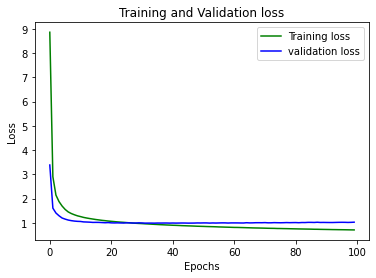

In [16]:
trainer.train(num_epochs=100, lr=0.0001, weight_decay=None)

In [17]:
print("Running DeepImputeTrainer ...\nAccuracy: {}".format(trainer.model_score(trainer.gene_dataset.data)))

Running DeepImputeTrainer ...
Accuracy: 0.6955776499680966


In [18]:
output=trainer.gene_dataset.data

In [19]:
adata_di=adata.copy()
output = np.array(output, dtype=float)
adata_di.X = output

#Quality check after scScope

In [20]:
a1=adata.copy()
a2=adata_di.copy()
sc.pp.calculate_qc_metrics(a1, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(a2, percent_top=None, log1p=False, inplace=True)

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


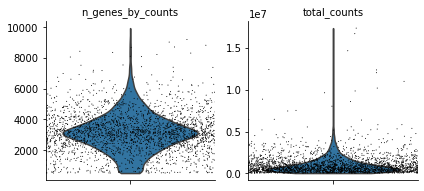

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


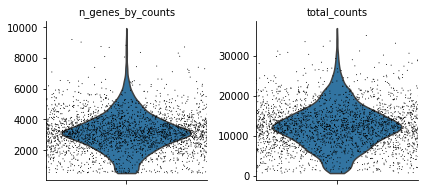

In [21]:
sc.pl.violin(a1, ['n_genes_by_counts', 'total_counts'],jitter=0.7, multi_panel=True)
sc.pl.violin(a2, ['n_genes_by_counts', 'total_counts'], jitter=0.7, multi_panel=True)

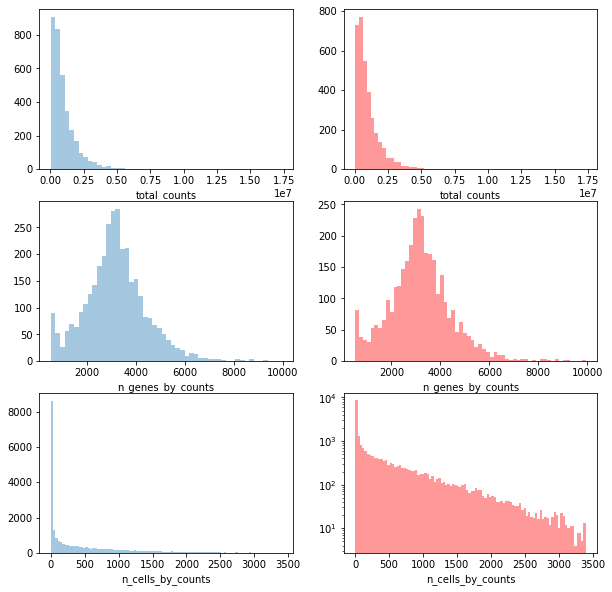

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
sns.distplot(a1.obs["total_counts"], kde=False, ax=axs[0,0])
sns.distplot(a1.obs["total_counts"], kde=False, bins=60, color= 'red', ax=axs[0,1])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, ax=axs[1,0])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, bins=60, color= 'red', ax=axs[1,1])
sns.distplot(a1.var["n_cells_by_counts"], kde=False,bins=100,  ax=axs[2,0])
plt.yscale('log') 
sns.distplot(a2.var["n_cells_by_counts"], kde=False, color= 'red',bins=100, ax=axs[2,1])
plt.yscale('log') 

#Principal Component analysis on datasets


... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


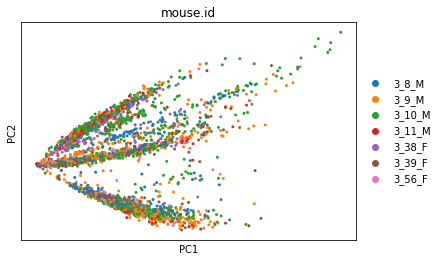

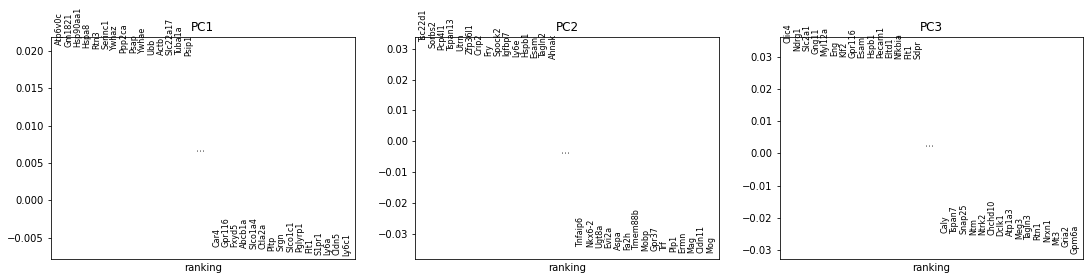

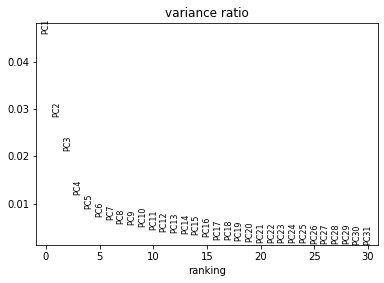

In [23]:
sc.pp.log1p(adata)
sc.pp.scale(adata)
sc.pp.pca(adata) 
sc.pl.pca_overview(adata, color='mouse.id')

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


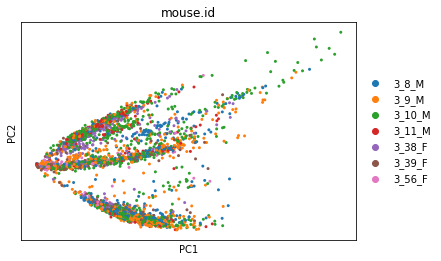

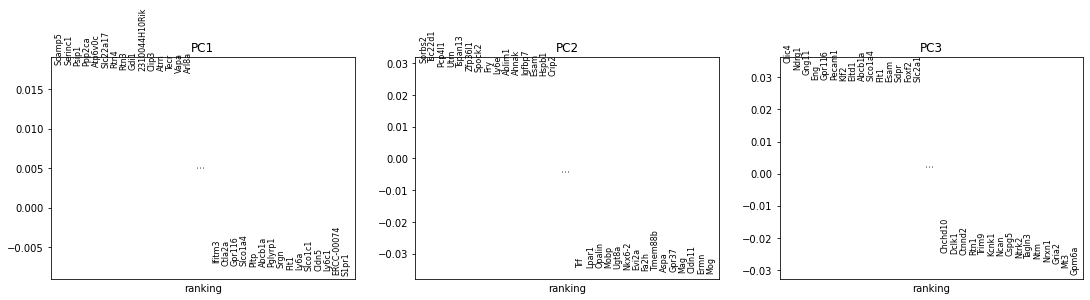

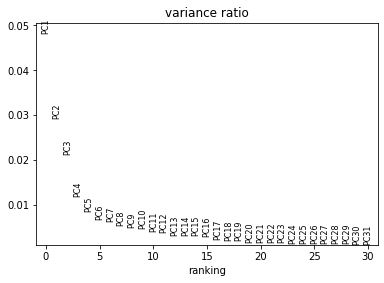

In [24]:
sc.pp.log1p(adata_di)
sc.pp.scale(adata_di)
sc.pp.pca(adata_di) 
sc.pl.pca_overview(adata_di, color='mouse.id')

#Dimensionality reduction

#1. tSNE 
visualing the data using tSNE before and after the model

In [25]:
q1=adata.copy()
q2=adata_di.copy()

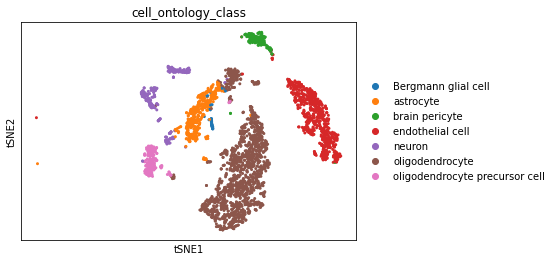

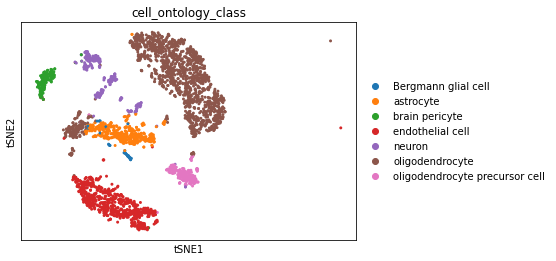

In [27]:
sc.tl.tsne(q1, perplexity=30, learning_rate=1000, random_state=0)
sc.tl.tsne(q2, perplexity=30, learning_rate=1000, random_state=0)
sc.pl.tsne(q1, color='cell_ontology_class')
sc.pl.tsne(q2, color='cell_ontology_class')

#2. UMAP
visualing the data using UMAP before and after the model


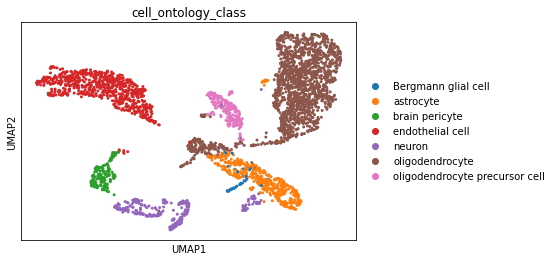

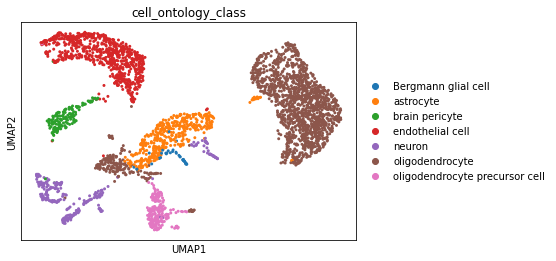

In [28]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pp.neighbors(adata_di)
sc.tl.umap(adata_di, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pl.umap(adata, color='cell_ontology_class')
sc.pl.umap(adata_di, color='cell_ontology_class')

#CLustering Analysis - using K-means


... storing 'kmeans' as categorical


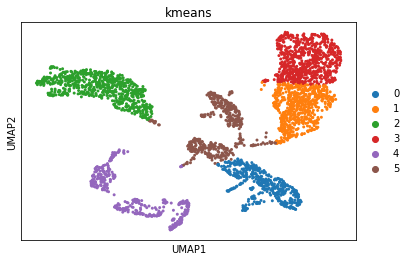

In [29]:
umap_coordinates = adata.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata.obs['kmeans'] = kmeans.labels_ 
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') 

In [30]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.54


... storing 'kmeans' as categorical


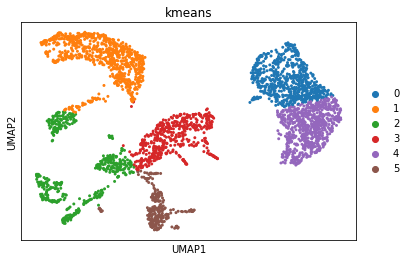

In [31]:
umap_coordinates = adata_di.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata_di.obs['kmeans'] = kmeans.labels_ 
adata_di.obs['kmeans'] = adata_di.obs['kmeans'].astype(str)

sc.pl.umap(adata_di, color='kmeans') 

In [32]:
rand_index = adjusted_rand_score(labels_true = adata_di.obs['cell_ontology_class'], labels_pred = adata_di.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.54


#Additional visualisations to see effect of the model on the data:

# 1. TracksPlot

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


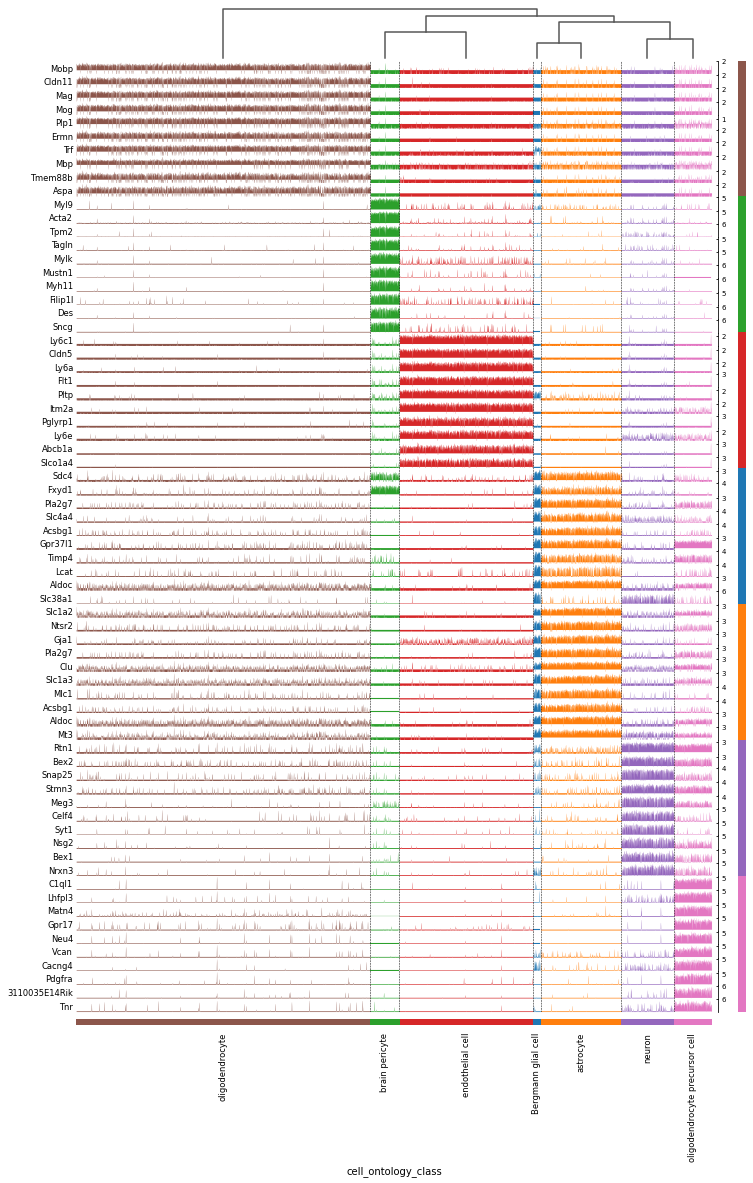

In [33]:
sc.tl.rank_genes_groups(adata, groupby='cell_ontology_class', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata, groupby='cell_ontology_class') # plot the result

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


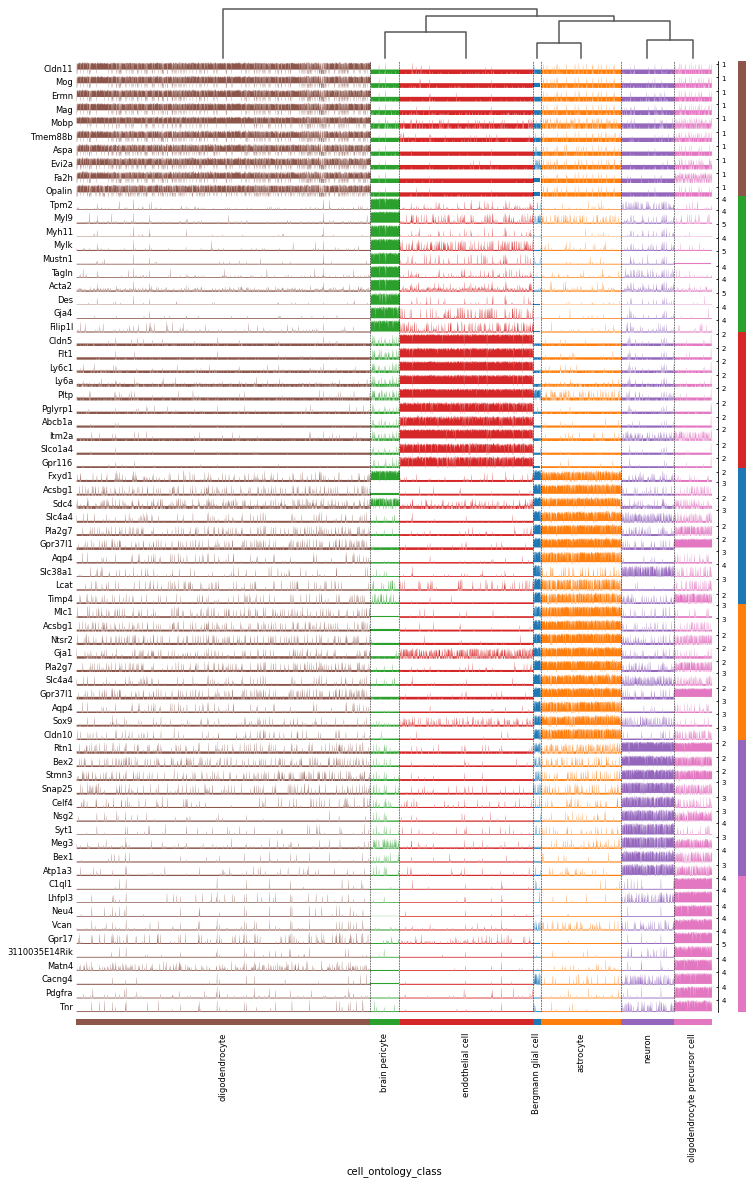

In [34]:
sc.tl.rank_genes_groups(adata_di, groupby='cell_ontology_class', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata_di, groupby='cell_ontology_class') # plot the result

# 2. Heatmaps

These hetamps clearly show that the missing values are being imputed by Deep Impute without distrubing the cell cluster patterns

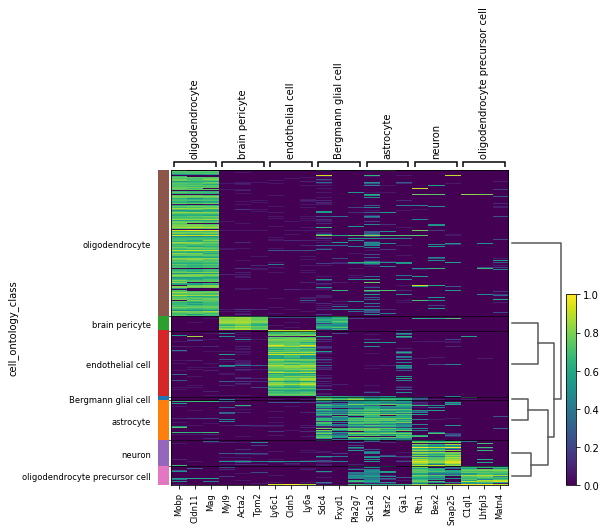

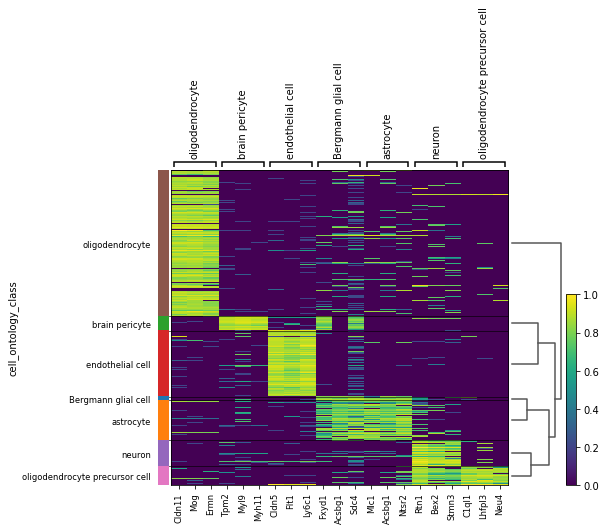

In [35]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=3, standard_scale='var')
sc.pl.rank_genes_groups_heatmap(adata_di, n_genes=3, standard_scale='var')

#Conclusions

Deep Impute effectively imputes the data having 0 gene expression level to improvise the clustering. This model can be proven as an effective way to improvise the clustering score